In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve

In [ ]:
df = pd.read_csv ('/content/drive/MyDrive/practice 3/Higgs Boson Machine Learning Challenge train.csv')

In [ ]:
df.head(3)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b


**Checking For Duplicate Data Points And Removing Them**

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(250000, 33)

In [ ]:
df.size

8250000

**The Dataset has 33 columns and 0.25 million data points. Total parameters are 8250000**

**Checking For Class Balance**

In [ ]:
df.Label.value_counts()

b    164333
s     85667
Name: Label, dtype: int64

In [ ]:
85667/164333

0.521301260245964

**Findings: Class 's' has 52% data points than the class 'b'. The dataset is imbalanced but not a lot**

**Checking For Missing Values**

In [ ]:
df.isnull().sum()

EventId                        0
DER_mass_MMC                   0
DER_mass_transverse_met_lep    0
DER_mass_vis                   0
DER_pt_h                       0
DER_deltaeta_jet_jet           0
DER_mass_jet_jet               0
DER_prodeta_jet_jet            0
DER_deltar_tau_lep             0
DER_pt_tot                     0
DER_sum_pt                     0
DER_pt_ratio_lep_tau           0
DER_met_phi_centrality         0
DER_lep_eta_centrality         0
PRI_tau_pt                     0
PRI_tau_eta                    0
PRI_tau_phi                    0
PRI_lep_pt                     0
PRI_lep_eta                    0
PRI_lep_phi                    0
PRI_met                        0
PRI_met_phi                    0
PRI_met_sumet                  0
PRI_jet_num                    0
PRI_jet_leading_pt             0
PRI_jet_leading_eta            0
PRI_jet_leading_phi            0
PRI_jet_subleading_pt          0
PRI_jet_subleading_eta         0
PRI_jet_subleading_phi         0
PRI_jet_al

**Checking For Unique Entries In Each Column**

In [ ]:
for i in df.columns:
  print (df[i].unique())

[100000 100001 100002 ... 349997 349998 349999]
[ 138.47   160.937 -999.    ...   80.388  164.31   217.02 ]
[ 51.655  68.768 162.172 ...  29.023  77.54   19.362]
[ 97.827 103.235 125.953 ... 115.781 749.97   75.839]
[ 27.98   48.146  35.635 ... 152.684 127.508 127.953]
[ 9.100e-01 -9.990e+02  2.636e+00 ...  7.543e+00  6.801e+00  7.316e+00]
[ 124.711 -999.     284.584 ...  216.006  322.296  119.437]
[ 2.666e+00 -9.990e+02 -5.400e-01 ...  5.530e+00  9.357e+00 -8.745e+00]
[3.064 3.473 3.148 ... 4.692 4.717 4.846]
[41.928  2.078  9.336 ... 39.628 38.975 48.742]
[197.76  125.157 197.814 ... 610.482 242.586  55.892]
[1.582 0.879 3.776 ... 5.388 7.916 6.579]
[ 1.396  1.414 -1.285 ...  0.283  0.305  0.224]
[ 2.00e-01 -9.99e+02  9.75e-01 ...  4.24e-01  3.66e-01  1.61e-01]
[ 32.638  42.014  32.154 ...  49.055  58.596 298.035]
[ 1.017  2.039 -0.705 ... -2.484 -2.496 -2.489]
[ 0.381 -3.011 -2.093 ... -3.052 -0.2    3.142]
[ 51.626  36.918 121.409 ...  96.884  84.542  95.57 ]
[ 2.273  0.501 -0.953 

**Checking For The Distibution Of Different Data Points In  All Columns**

In [ ]:
for i in df.columns:
  print (df[i].value_counts)

<bound method IndexOpsMixin.value_counts of 0         100000
1         100001
2         100002
3         100003
4         100004
           ...  
249995    349995
249996    349996
249997    349997
249998    349998
249999    349999
Name: EventId, Length: 250000, dtype: int64>
<bound method IndexOpsMixin.value_counts of 0         138.470
1         160.937
2        -999.000
3         143.905
4         175.864
           ...   
249995   -999.000
249996   -999.000
249997    105.457
249998     94.951
249999   -999.000
Name: DER_mass_MMC, Length: 250000, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0          51.655
1          68.768
2         162.172
3          81.417
4          16.915
           ...   
249995     71.989
249996     58.179
249997     60.526
249998     19.362
249999     72.756
Name: DER_mass_transverse_met_lep, Length: 250000, dtype: float64>
<bound method IndexOpsMixin.value_counts of 0          97.827
1         103.235
2         125.953
3          80.943
4    

In [ ]:
df.EventId.value_counts()

100000    1
266657    1
266659    1
266660    1
266661    1
         ..
183337    1
183338    1
183339    1
183340    1
349999    1
Name: EventId, Length: 250000, dtype: int64

**Findings: The column EventId has all unique values and according to the dataset information, it is just a unique identifier for all rows. Therefore, it is not important**

**Dropping The EventId Column:**

In [ ]:
df = df.iloc[:, 1:]

In [ ]:
df.head(3)

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b


In [ ]:
df.shape

(250000, 32)

**Checking For Data Types**

In [ ]:
df.dtypes

DER_mass_MMC                   float64
DER_mass_transverse_met_lep    float64
DER_mass_vis                   float64
DER_pt_h                       float64
DER_deltaeta_jet_jet           float64
DER_mass_jet_jet               float64
DER_prodeta_jet_jet            float64
DER_deltar_tau_lep             float64
DER_pt_tot                     float64
DER_sum_pt                     float64
DER_pt_ratio_lep_tau           float64
DER_met_phi_centrality         float64
DER_lep_eta_centrality         float64
PRI_tau_pt                     float64
PRI_tau_eta                    float64
PRI_tau_phi                    float64
PRI_lep_pt                     float64
PRI_lep_eta                    float64
PRI_lep_phi                    float64
PRI_met                        float64
PRI_met_phi                    float64
PRI_met_sumet                  float64
PRI_jet_num                      int64
PRI_jet_leading_pt             float64
PRI_jet_leading_eta            float64
PRI_jet_leading_phi      

**Findings: Except the output columns all columns are numerical so there's no need of one hot encoding on the input features**

**Looking For All Column Names**

In [ ]:
df.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

**Encoding The Target Variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder ()
df.iloc [:, 31] = labelencoder.fit_transform (df.iloc [:,31])

**Checking The Encoded Target Variable**

In [ ]:
df.Label.value_counts()

0    164333
1     85667
Name: Label, dtype: int64

**Looking For Mean, Minimum And Standard Values: Statistical Anaylsis**

In [ ]:
df.describe()

,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,158.432217,...,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767,0.342668
std,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,115.706115,...,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103,0.474603
min,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,46.104000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502,0.000000
25%,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,77.550000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636,0.000000
50%,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,120.664500,...,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188,0.000000
75%,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,200.478250,...,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128,1.000000
max,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,1852.462000,...,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543,1.000000


**Checking for Data Distribution**

In [ ]:
from scipy.stats import anderson

normal_dist_cols = []
not_normal_dist_cols = []

for col in df.columns:
    result = anderson(df[col])
    # print(f"{col}: Anderson-Darling Test Statistic={result.statistic:.4f}, Critical Values={result.critical_values}, Significance Level={result.significance_level:.4f}")
    alpha = 0.05
    if result.statistic < result.critical_values[2] and p > alpha:
        # print(f"{col} Data looks normally distributed")
        normal_dist_cols.append(col)
    else:
        #print(f"{col} Data is not normally distributed")
        not_normal_dist_cols.append(col)

print ("normal distribution columns:", normal_dist_cols)
print ("non-uniform distribution columns:", not_normal_dist_cols)

normal distribution columns: []
non-uniform distribution columns: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt', 'Weight', 'Label']


**QQ Plots**

In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

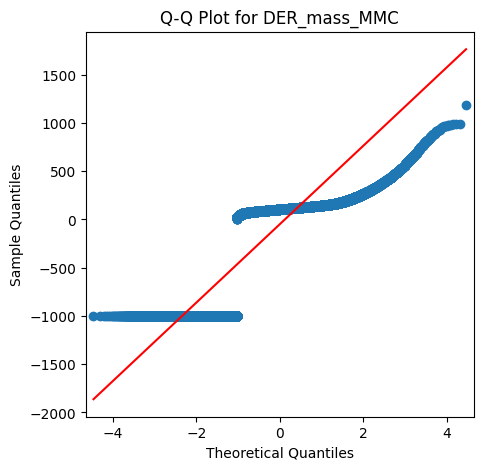

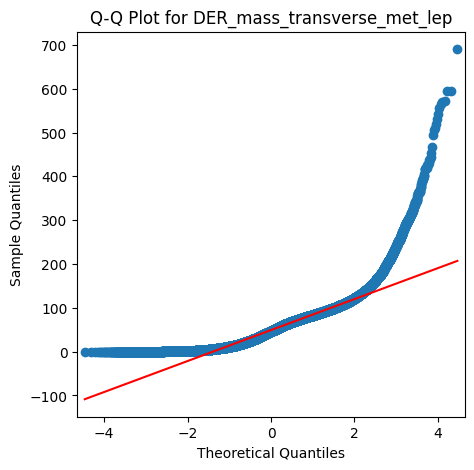

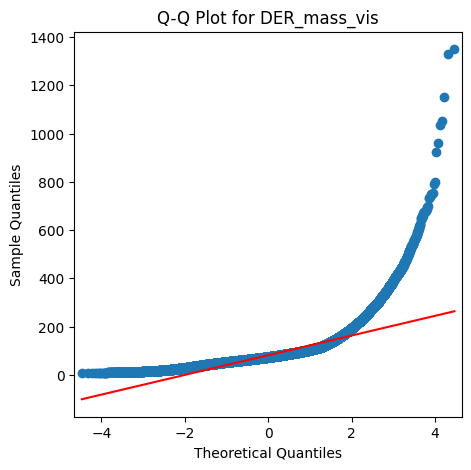

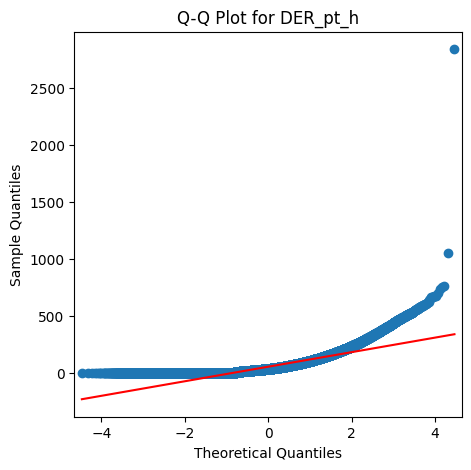

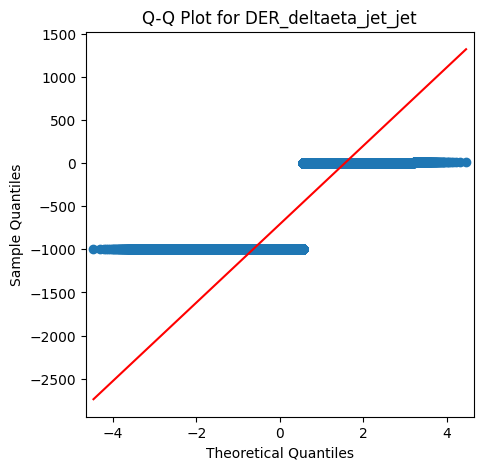

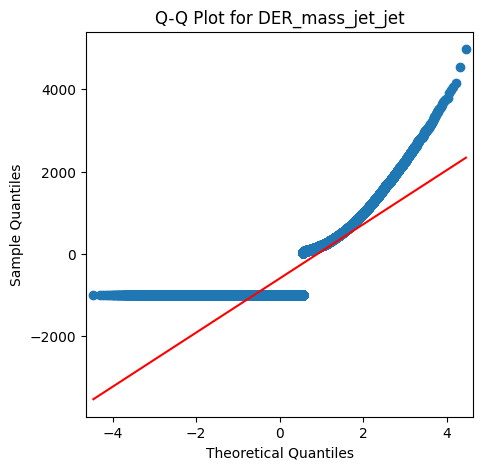

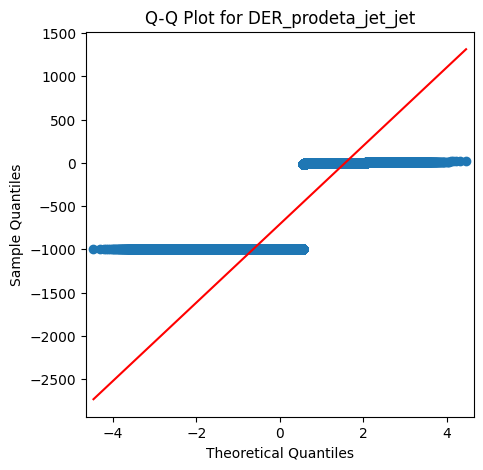

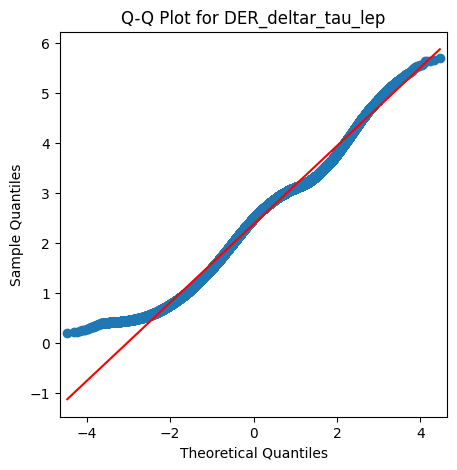

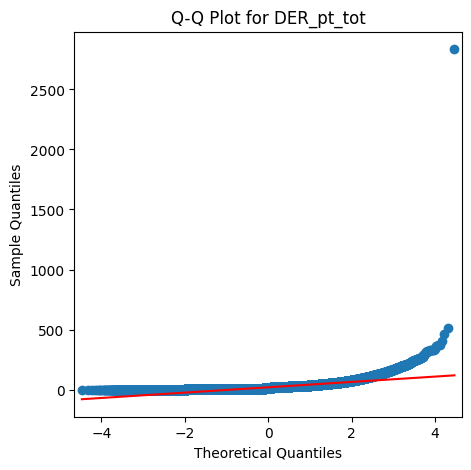

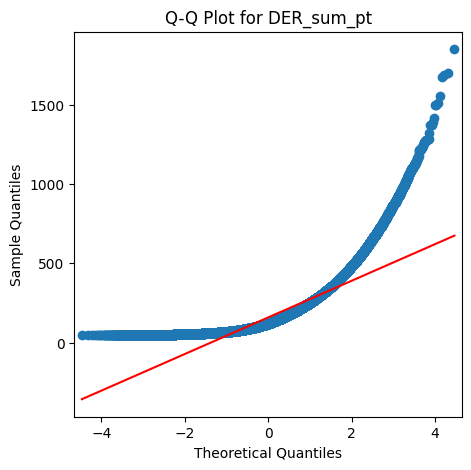

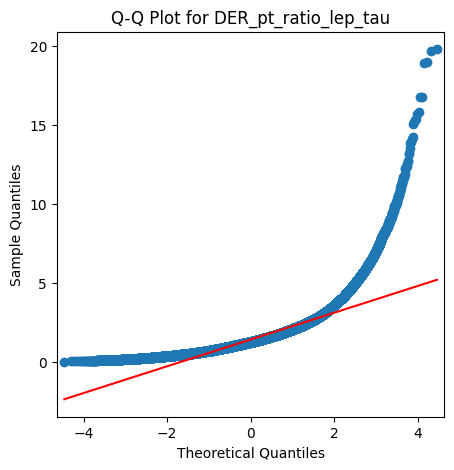

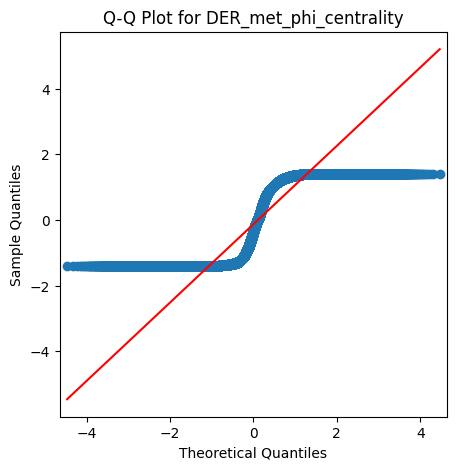

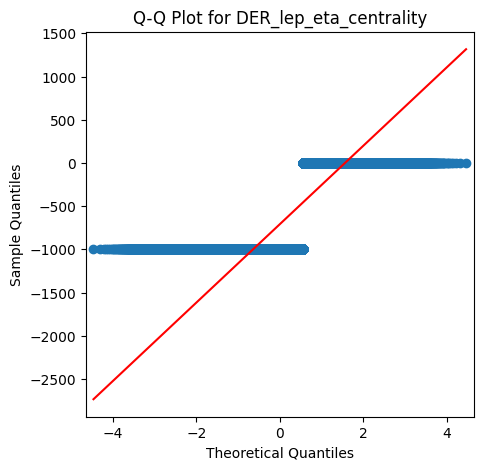

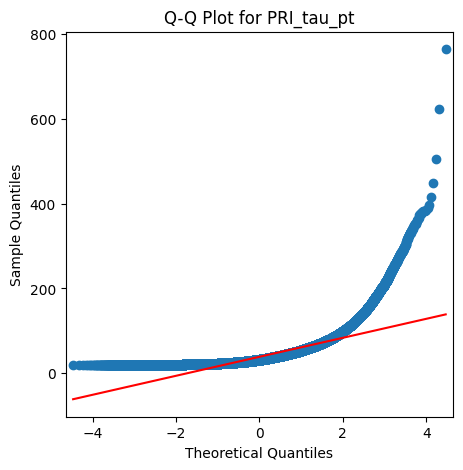

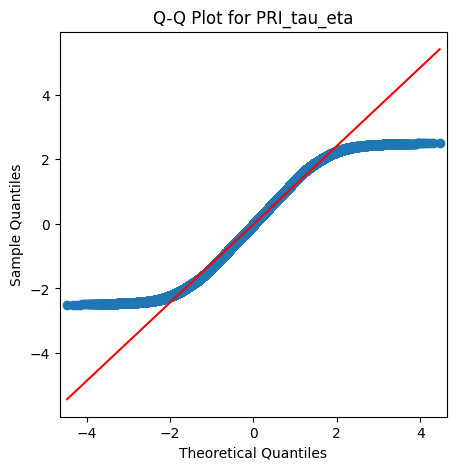

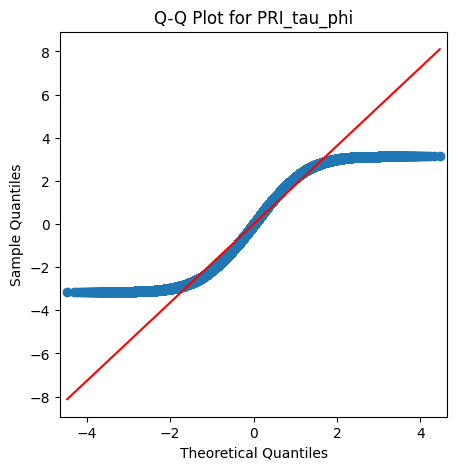

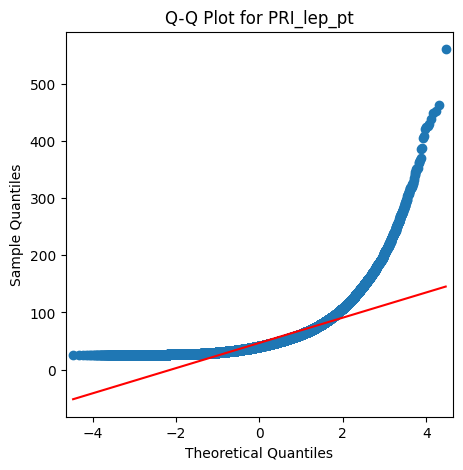

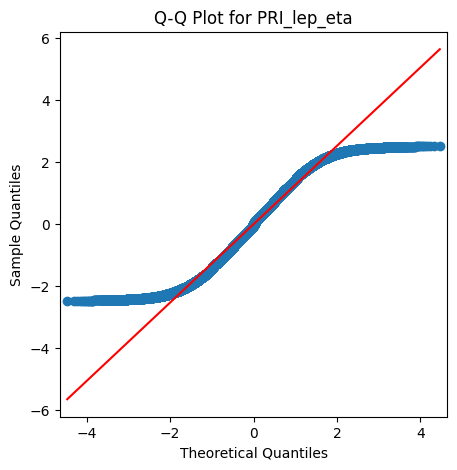

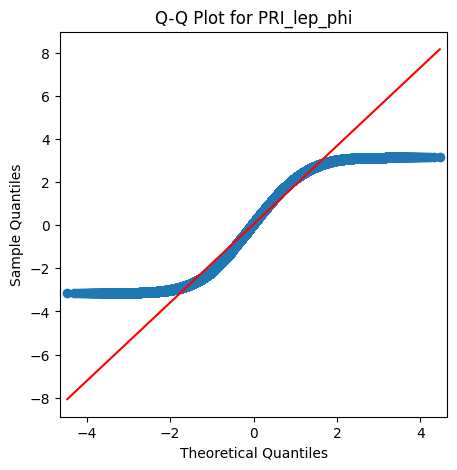

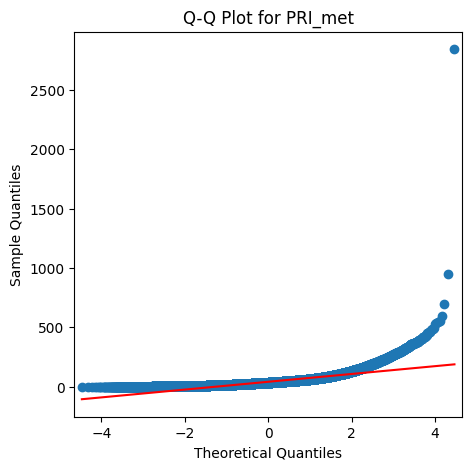

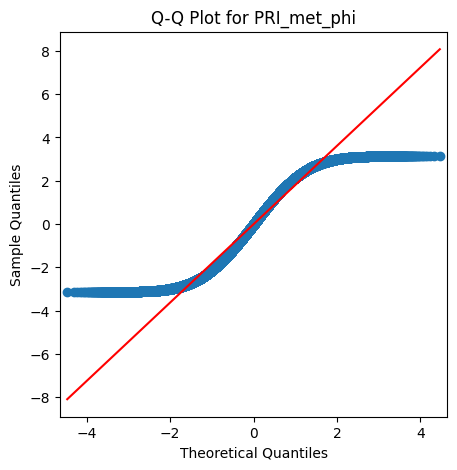

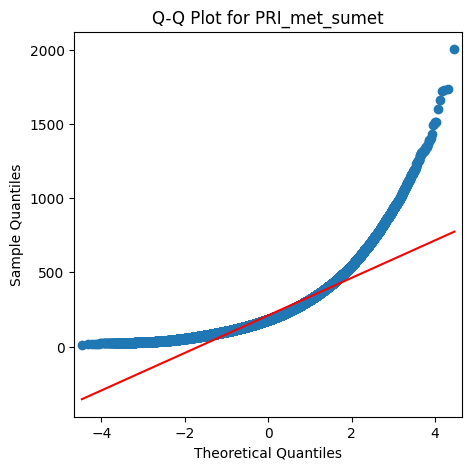

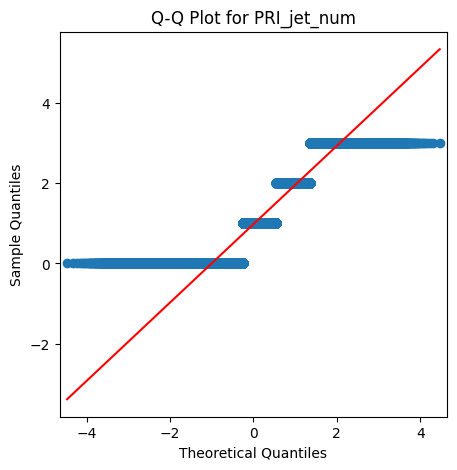

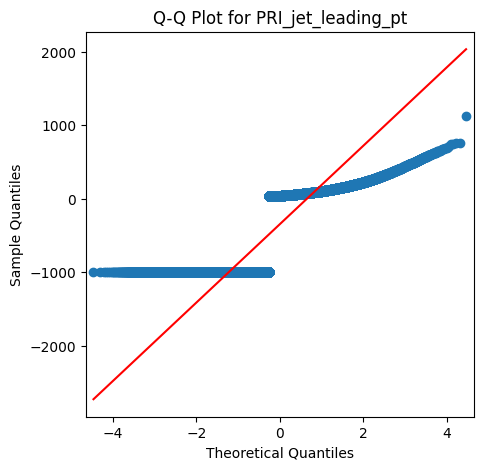

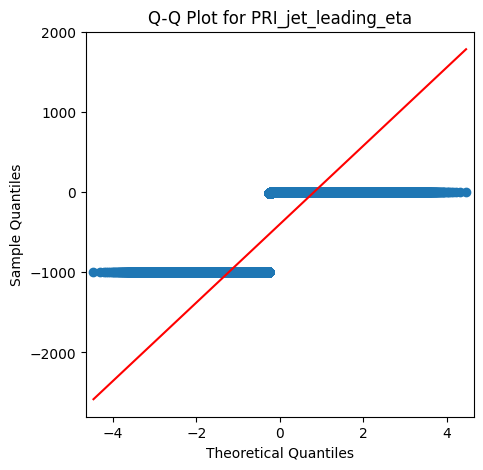

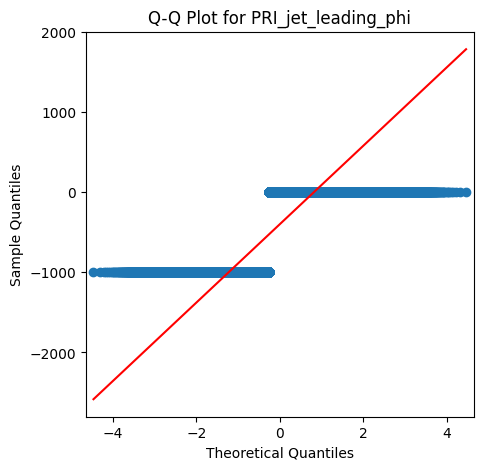

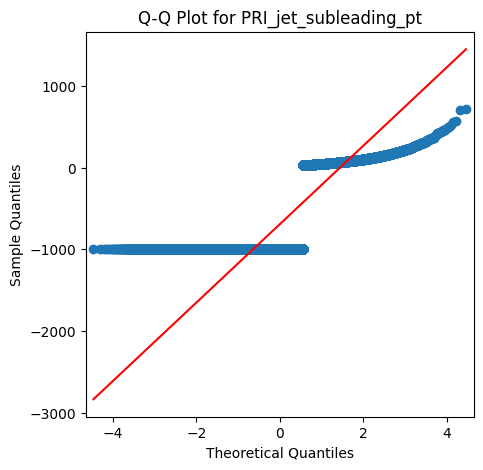

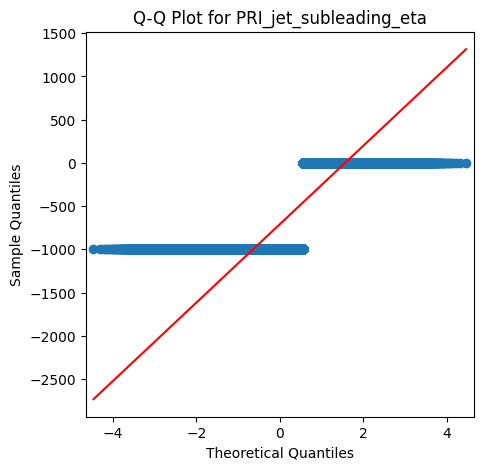

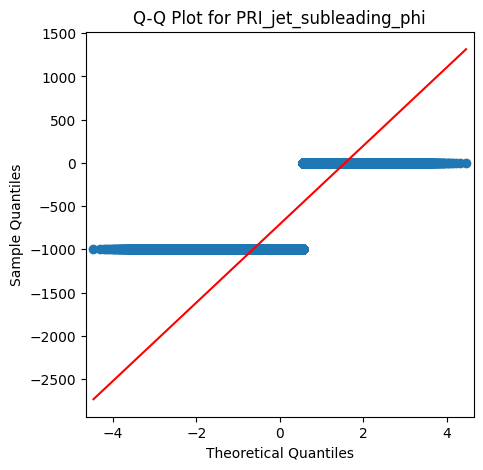

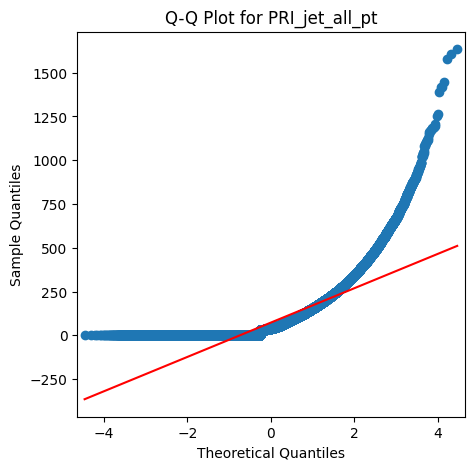

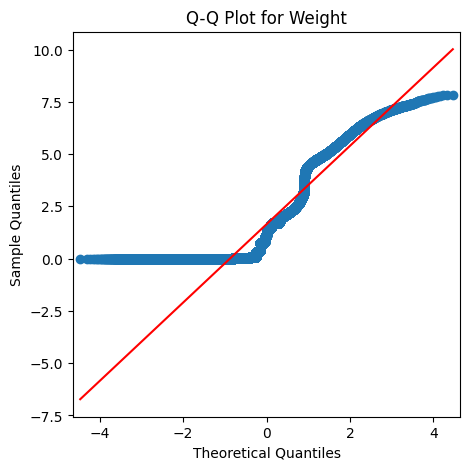

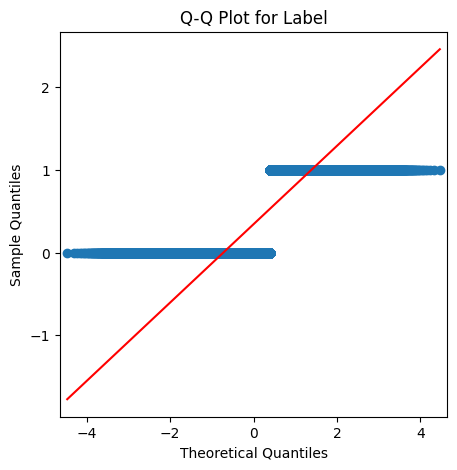

In [ ]:
for i in df.columns:
  fig, ax = plt.subplots(figsize=(5,5))
  qqplot(df[i], line='s', ax=ax)
  ax.set_title(f'Q-Q Plot for {i}')
  plt.show()

**Plotting Histograms:**

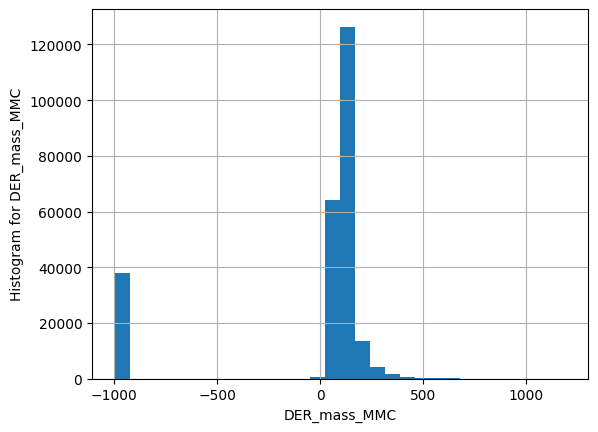

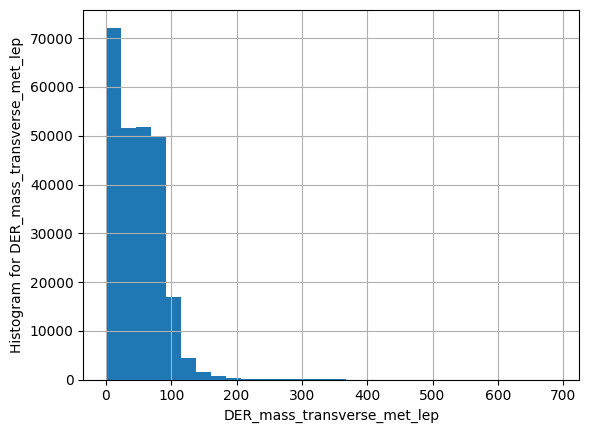

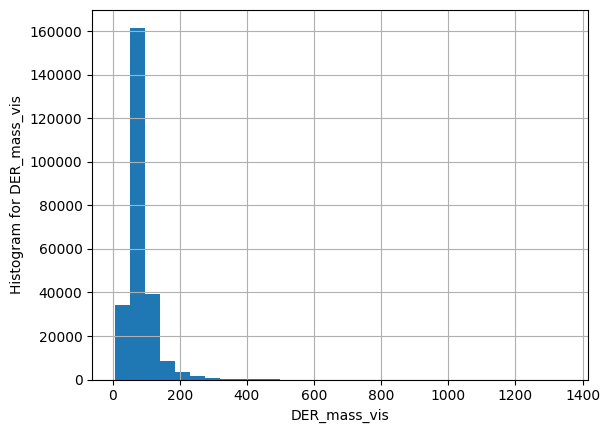

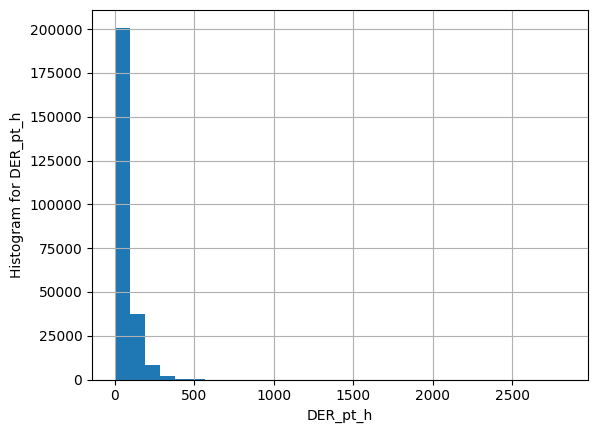

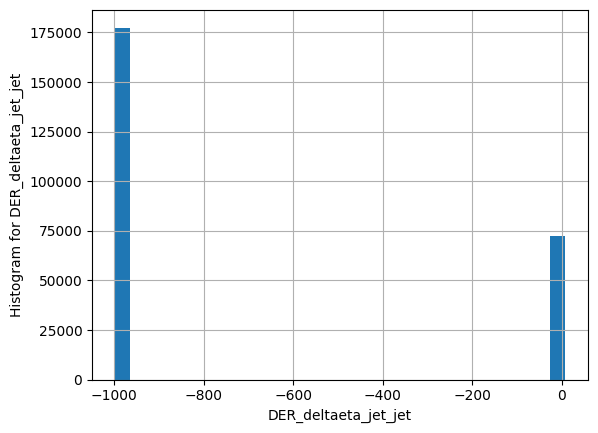

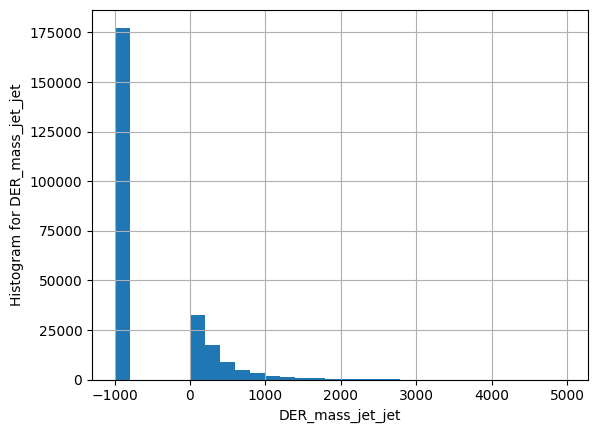

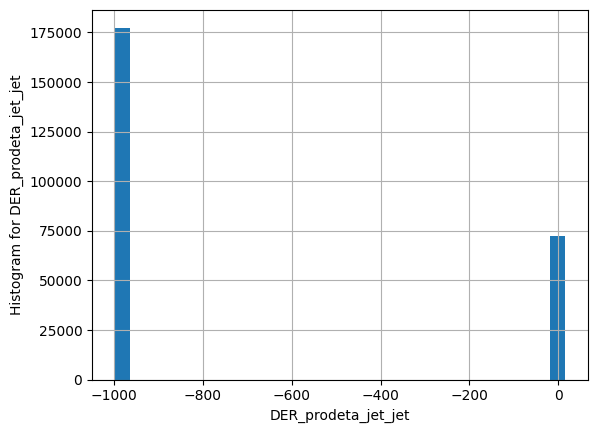

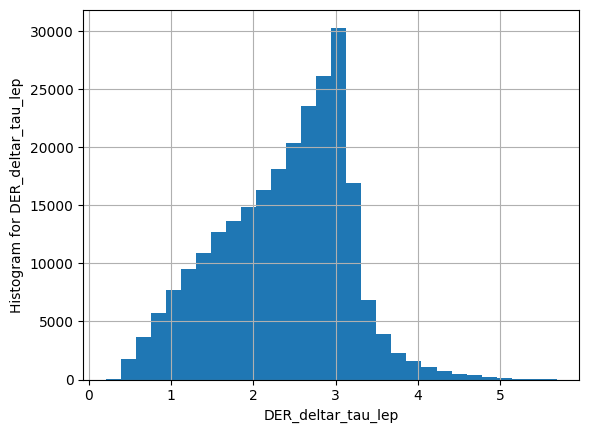

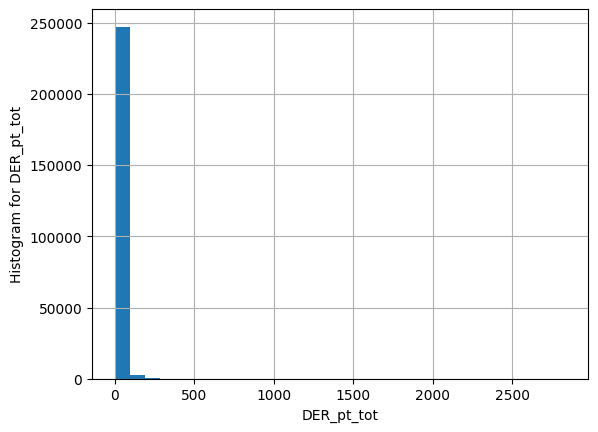

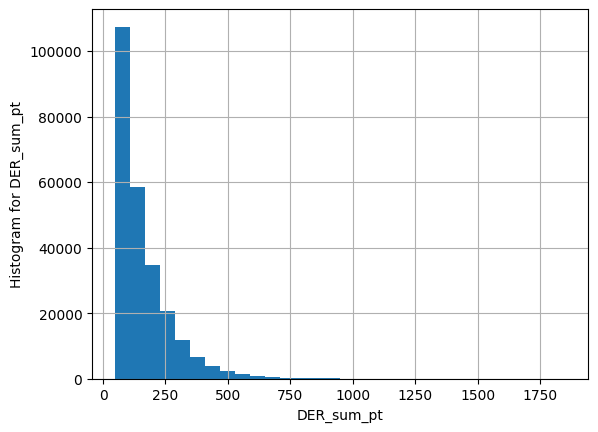

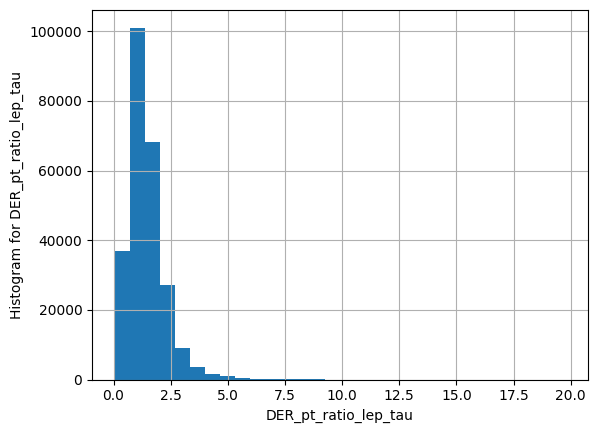

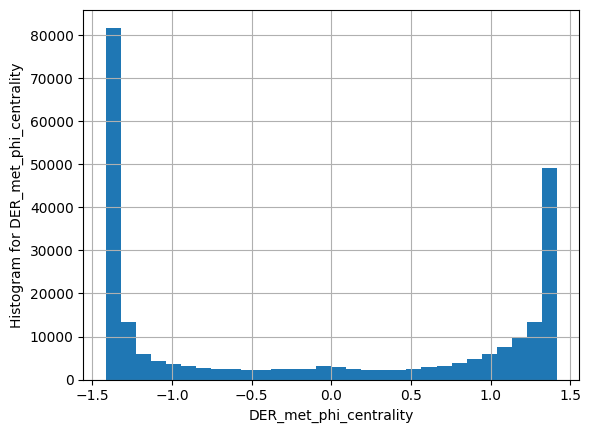

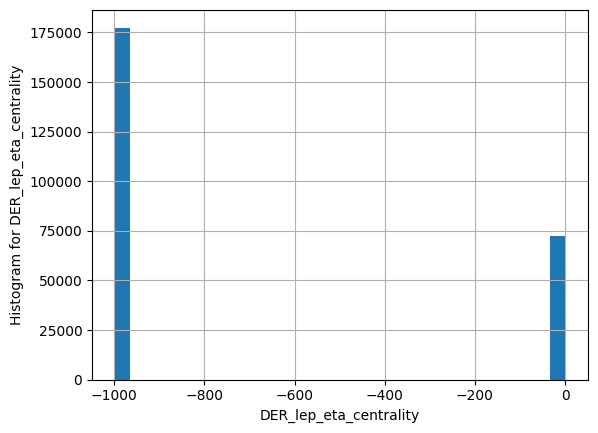

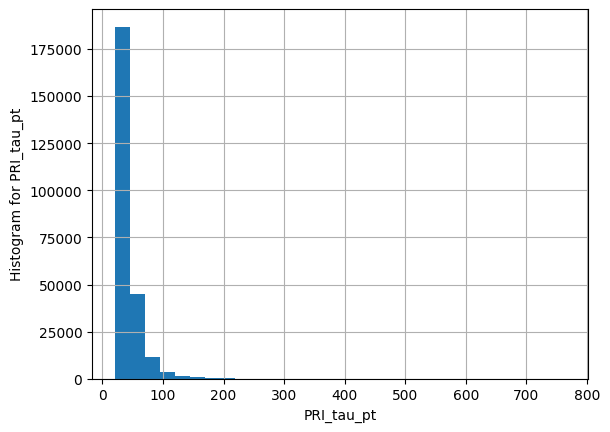

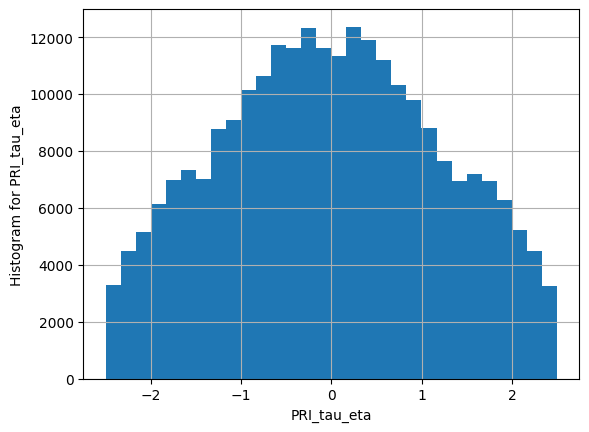

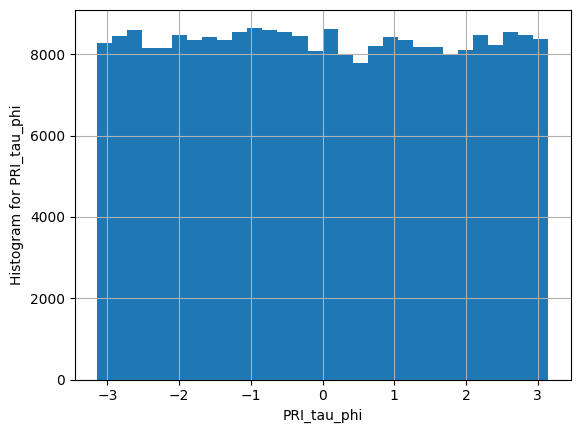

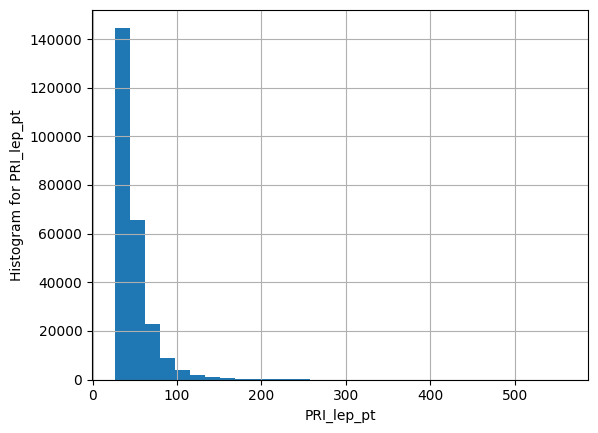

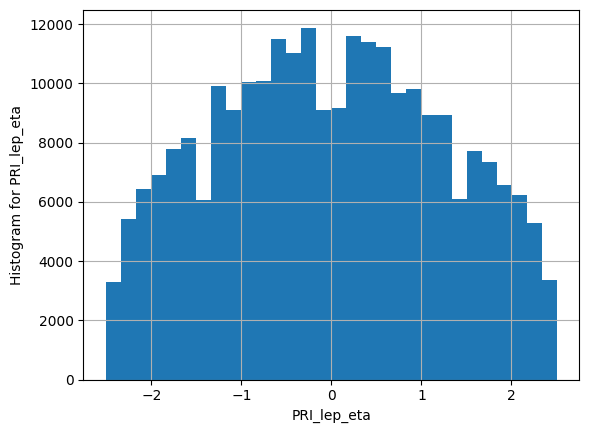

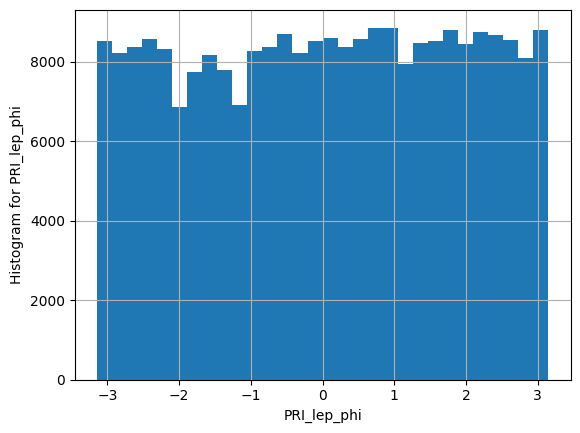

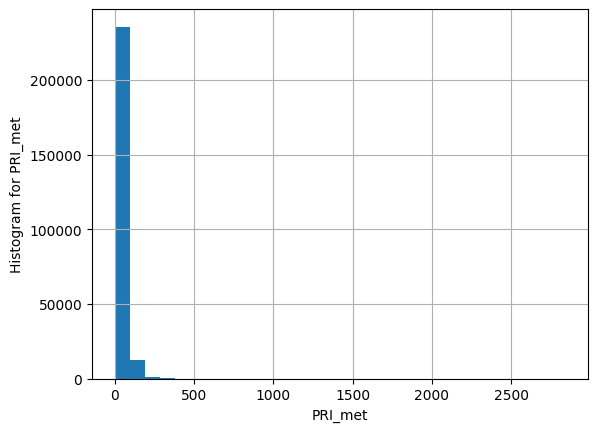

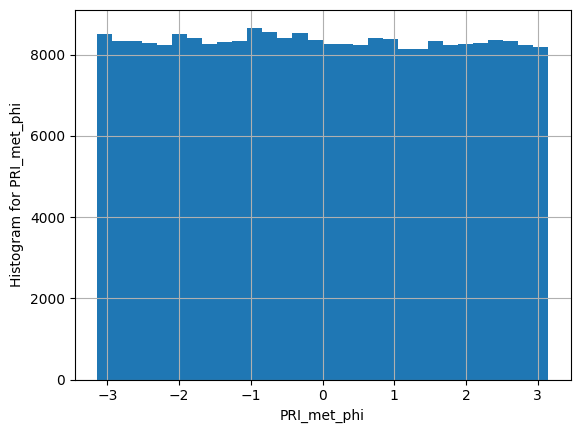

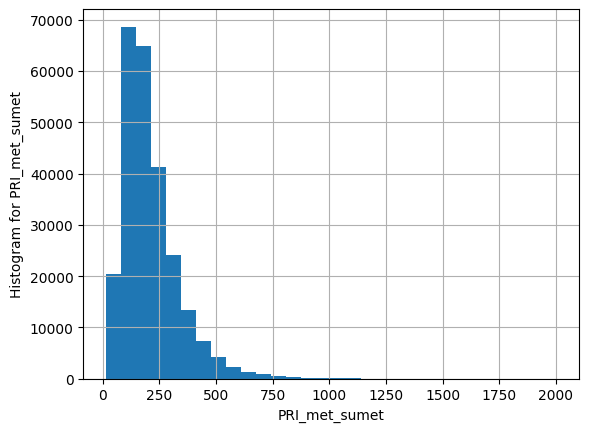

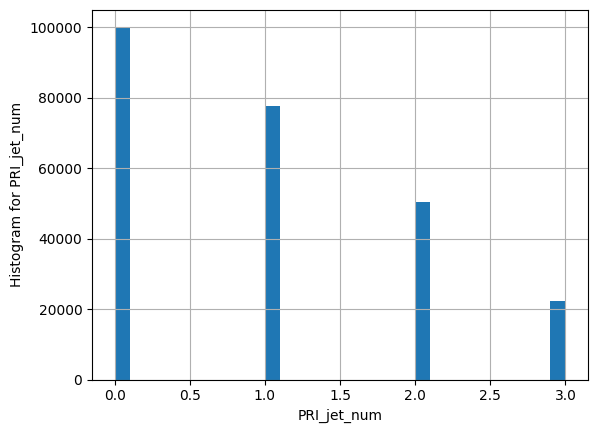

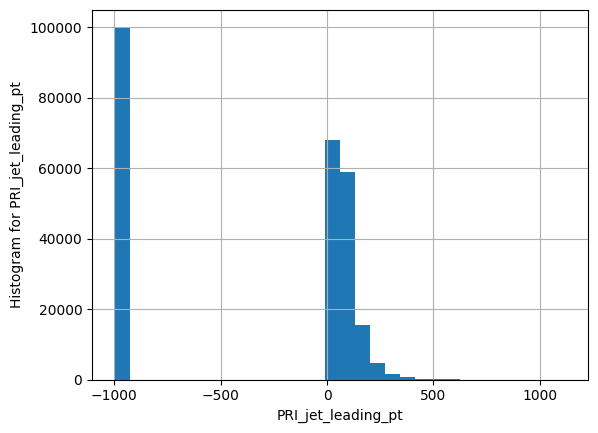

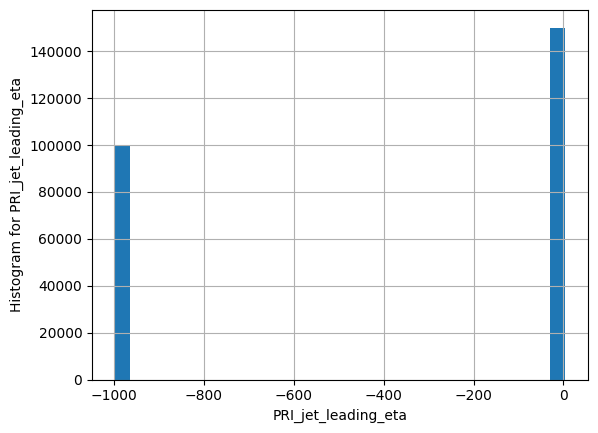

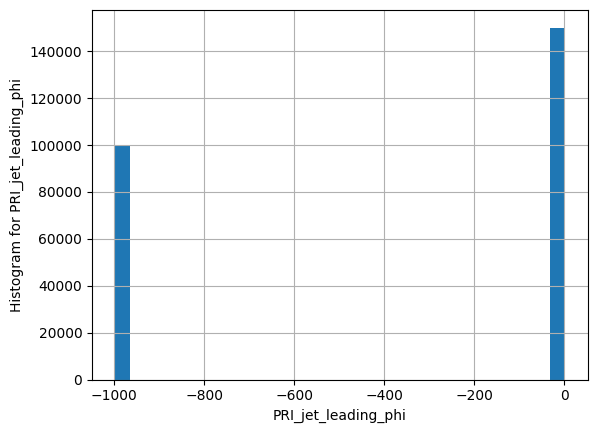

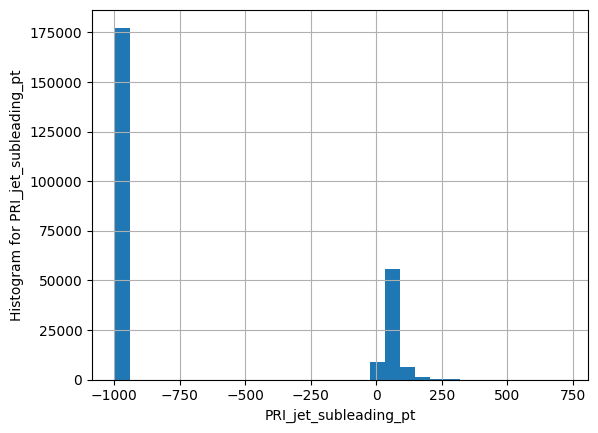

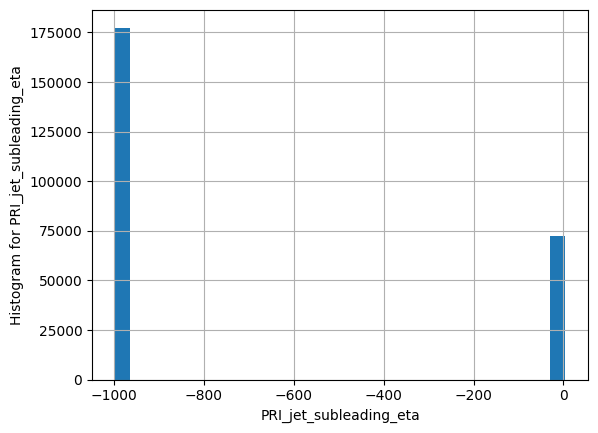

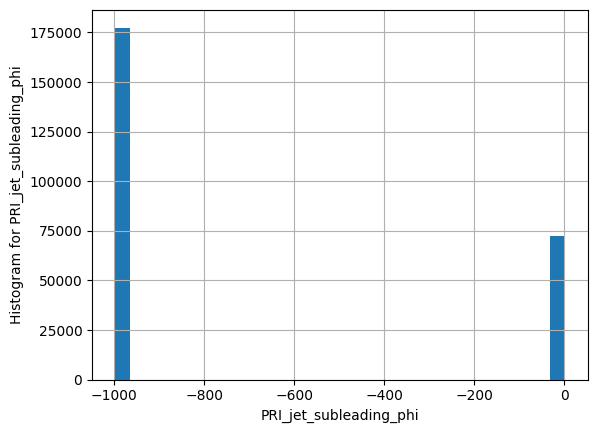

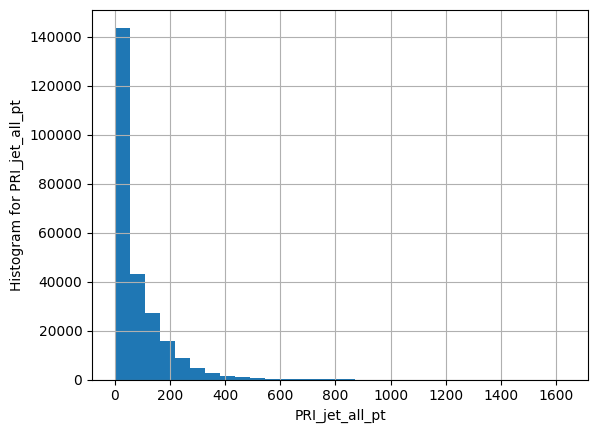

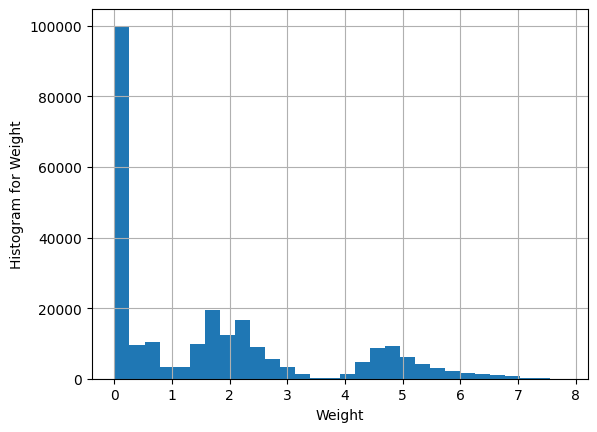

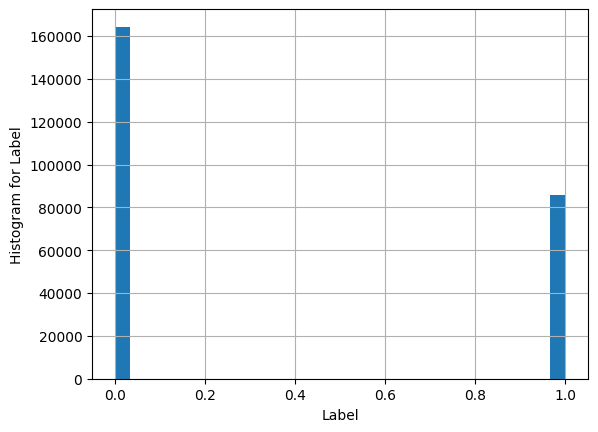

In [ ]:
for i in df.columns:
    plt.figure()
    plt.hist (df[i], bins=30)
    plt.xlabel (f'{i}')
    plt.ylabel (f'Histogram for {i}')
    plt.grid()

**Plotting Bell Curves**

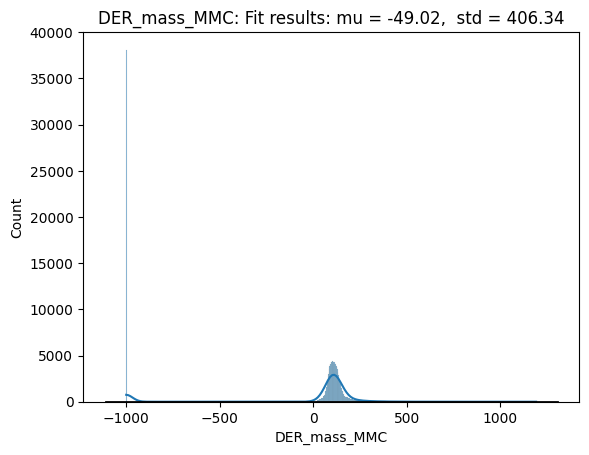

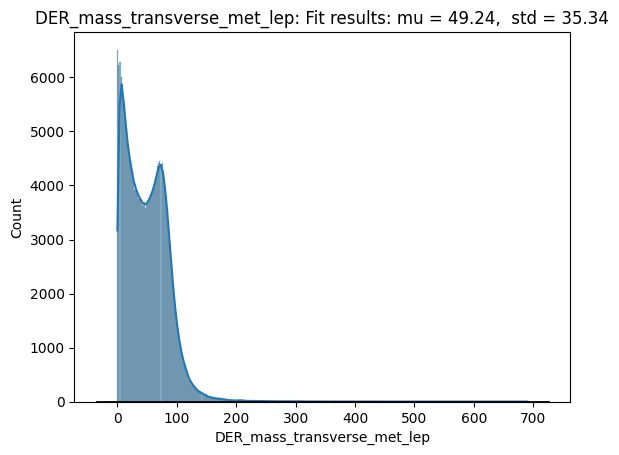

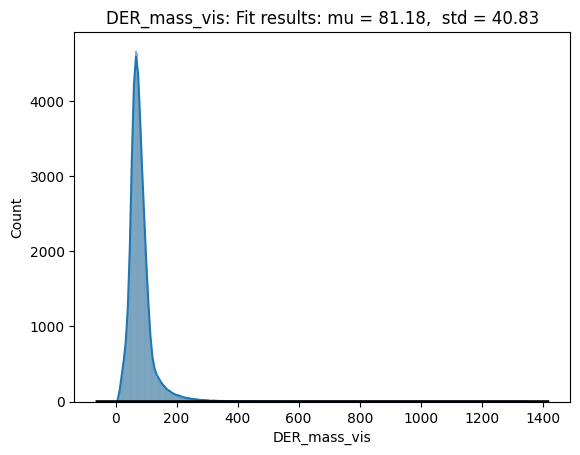

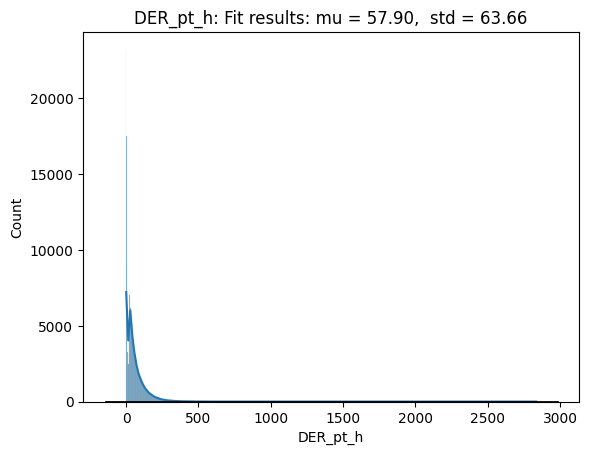

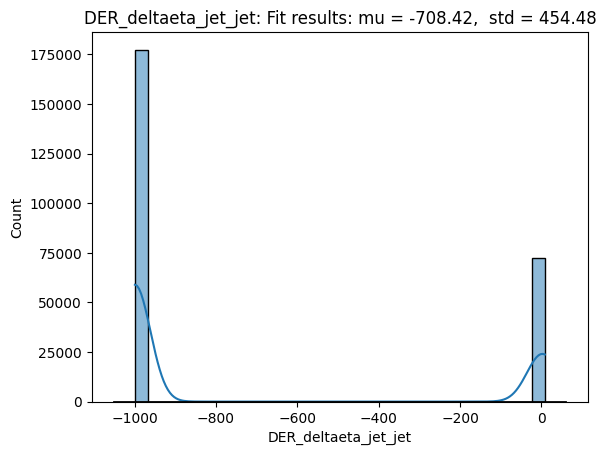

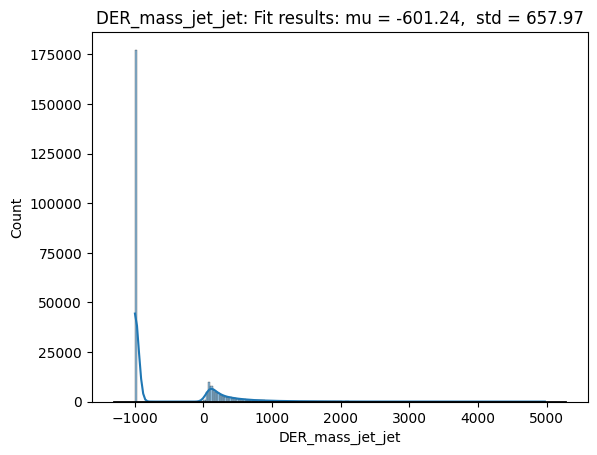

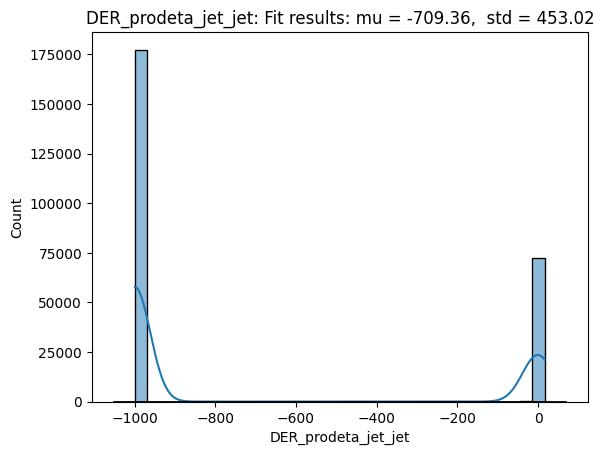

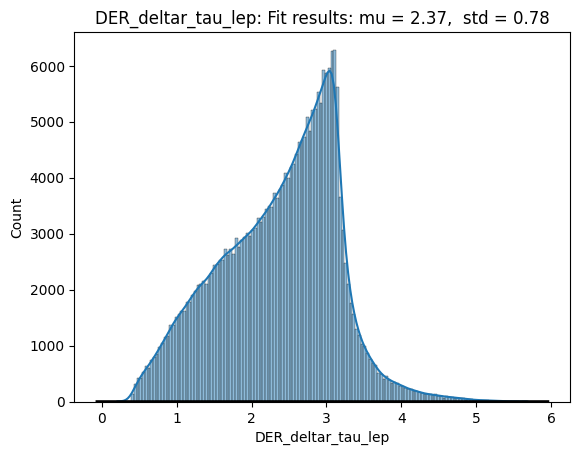

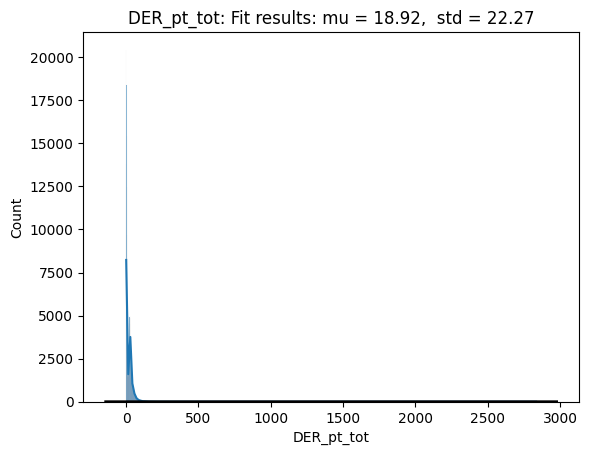

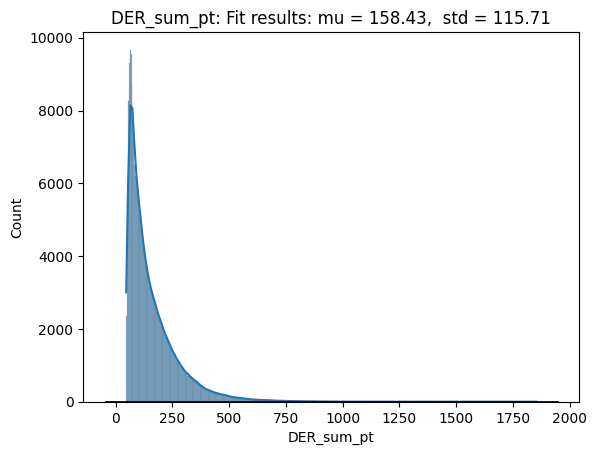

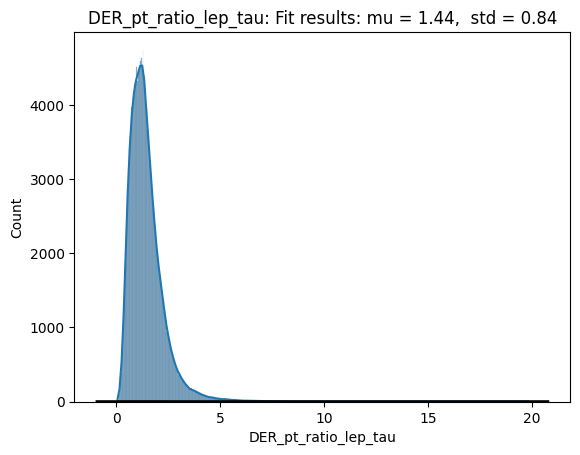

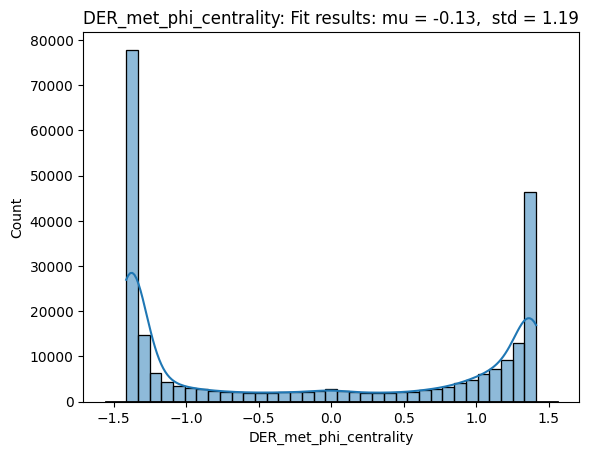

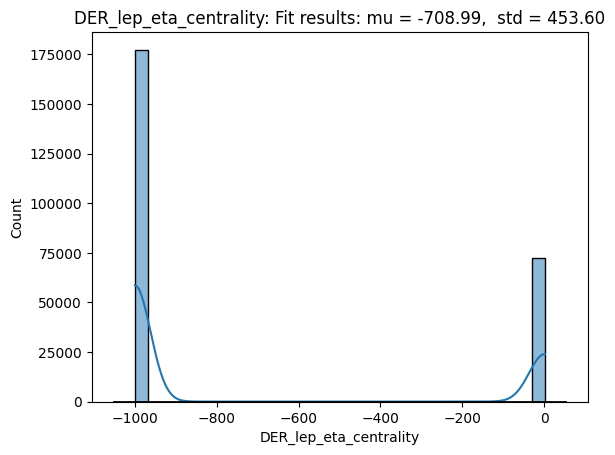

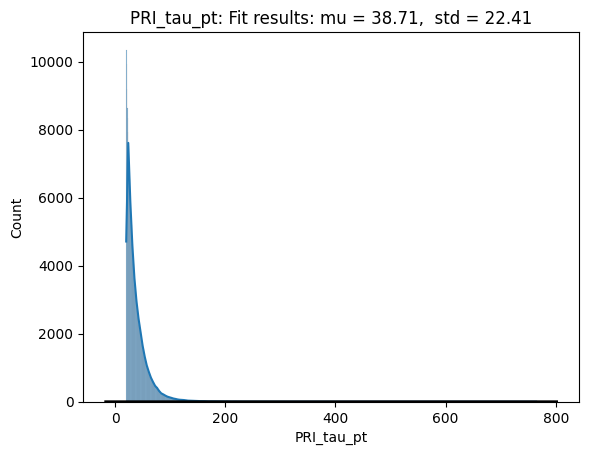

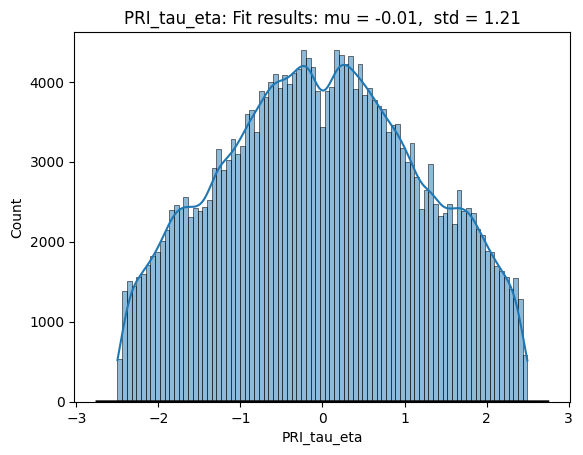

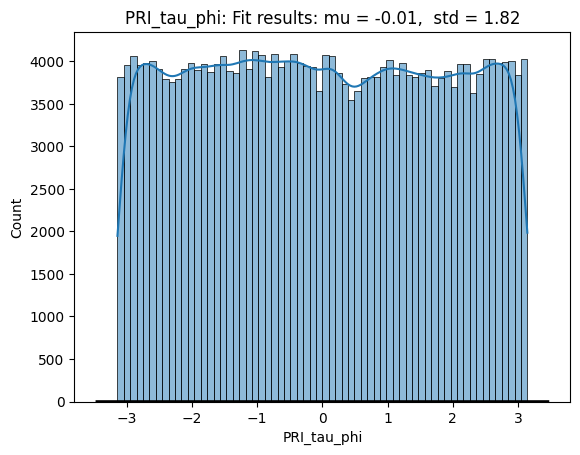

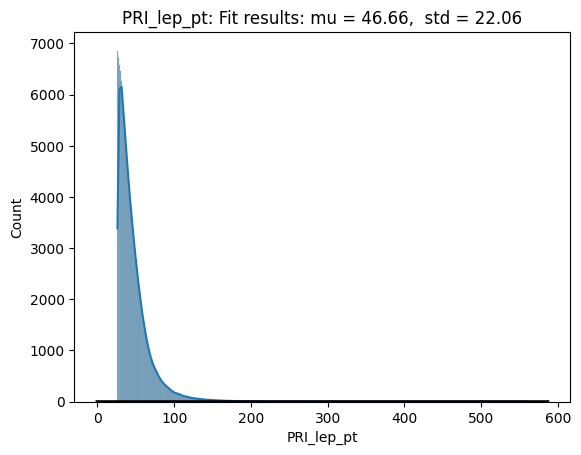

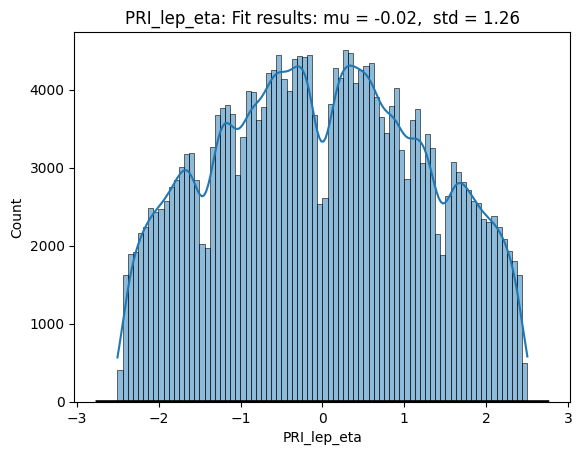

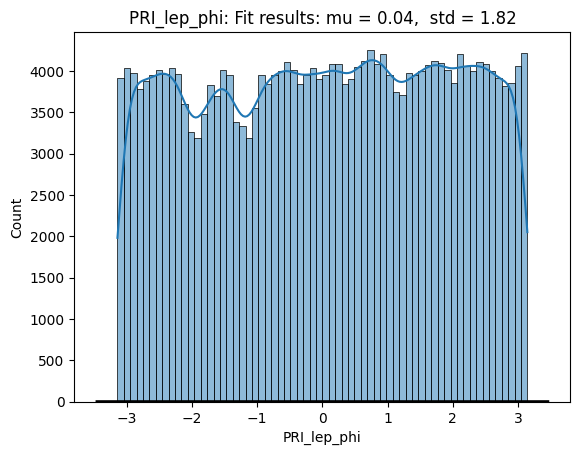

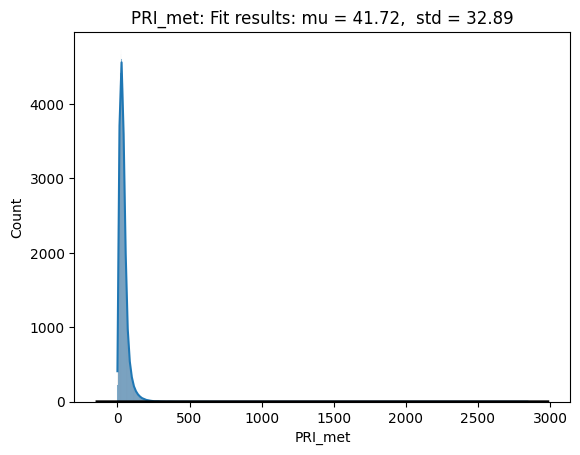

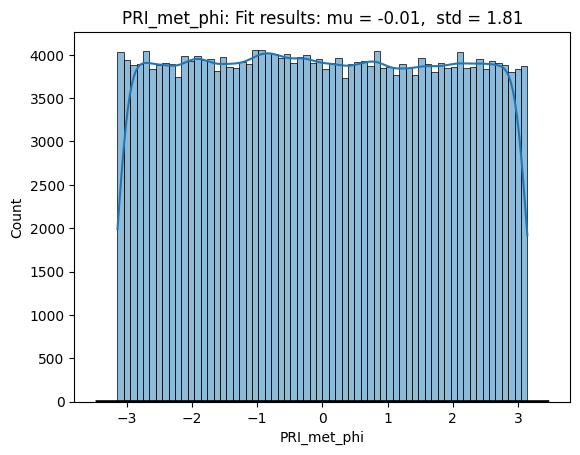

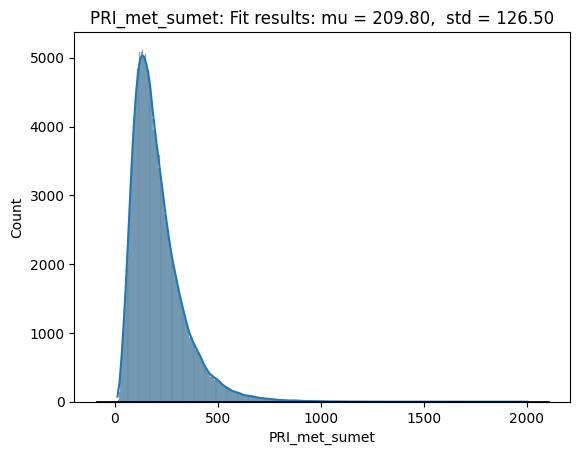

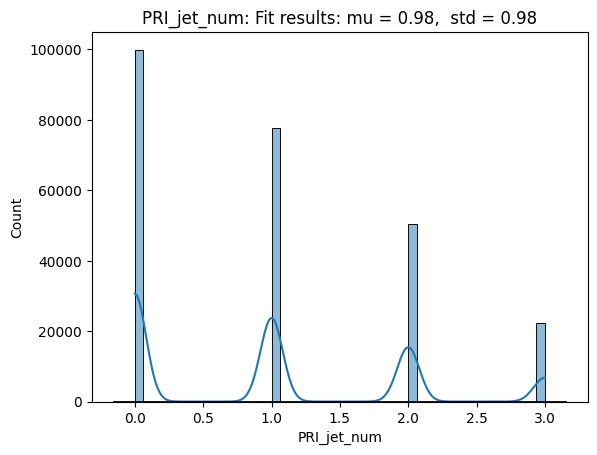

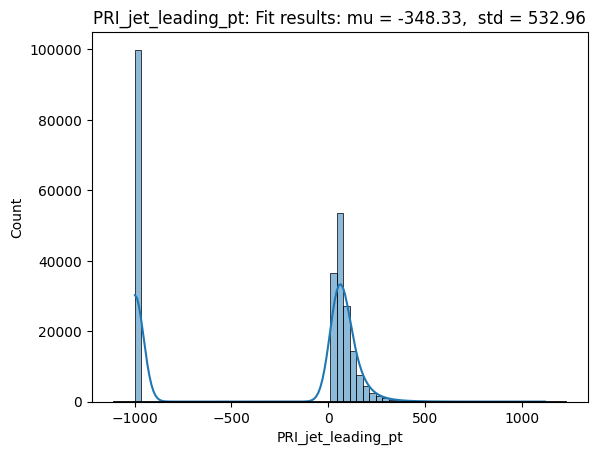

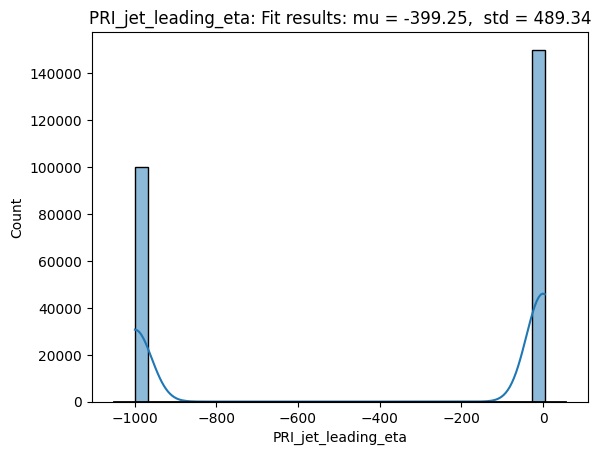

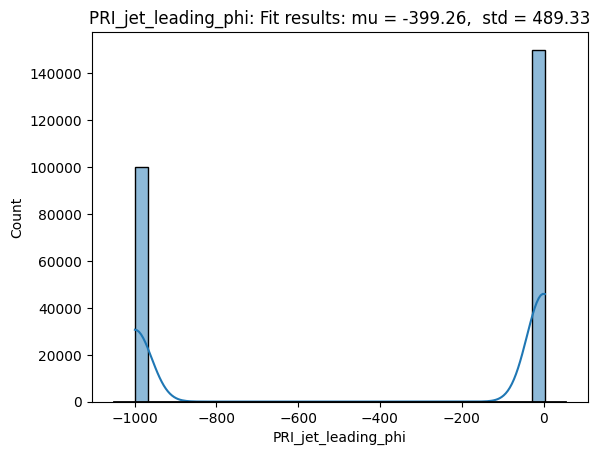

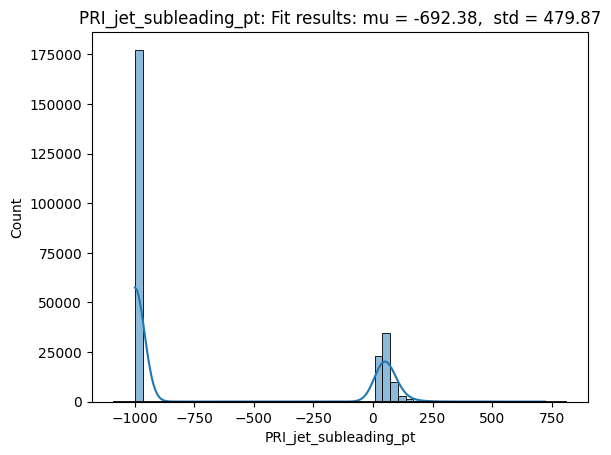

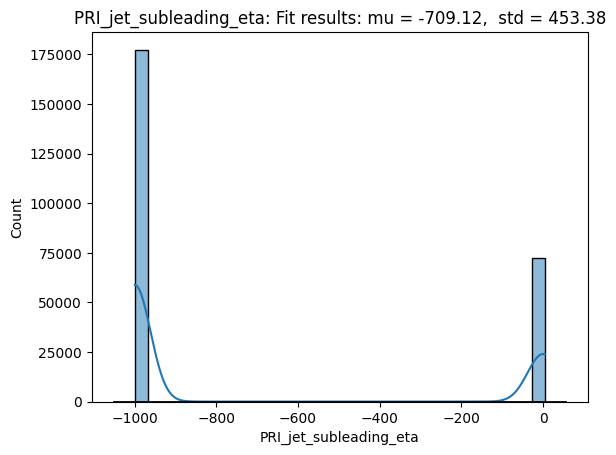

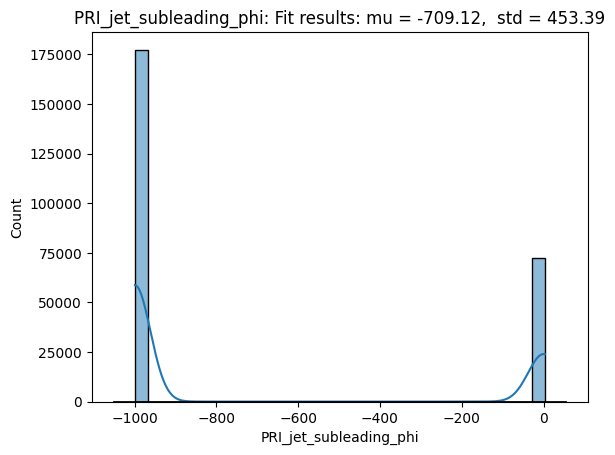

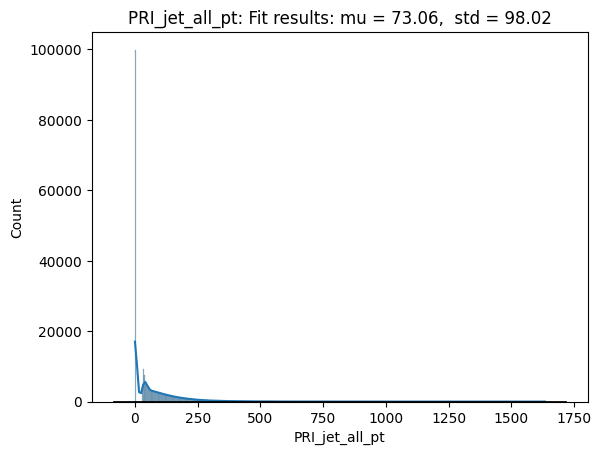

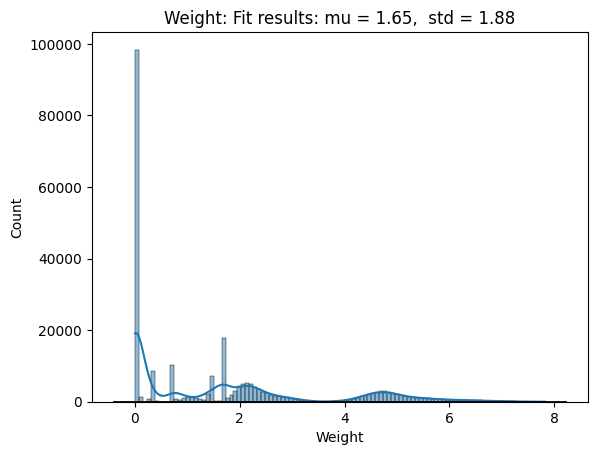

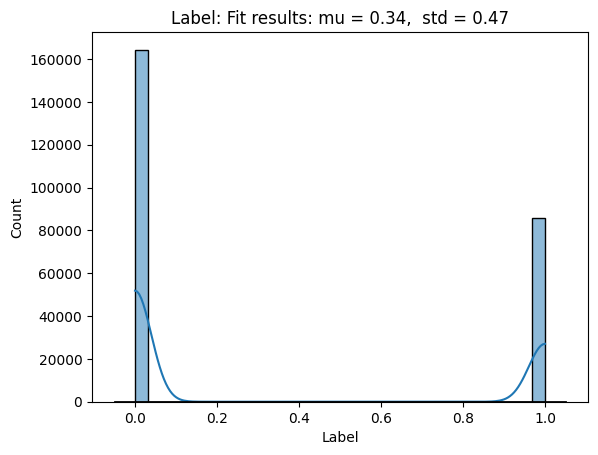

In [ ]:
from scipy.stats import norm

def plot_bell_curve(df):
    for col in df.columns:
        sns.histplot(df[col], kde=True)
        mu, std = norm.fit(df[col])
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, 'k', linewidth=2)
        title = f"{col}: Fit results: mu = {mu:.2f},  std = {std:.2f}"
        plt.title(title)
        plt.show()

plot_bell_curve(df)

**Looking For Correlation: Potting The Correlation Graph**

<Axes: >

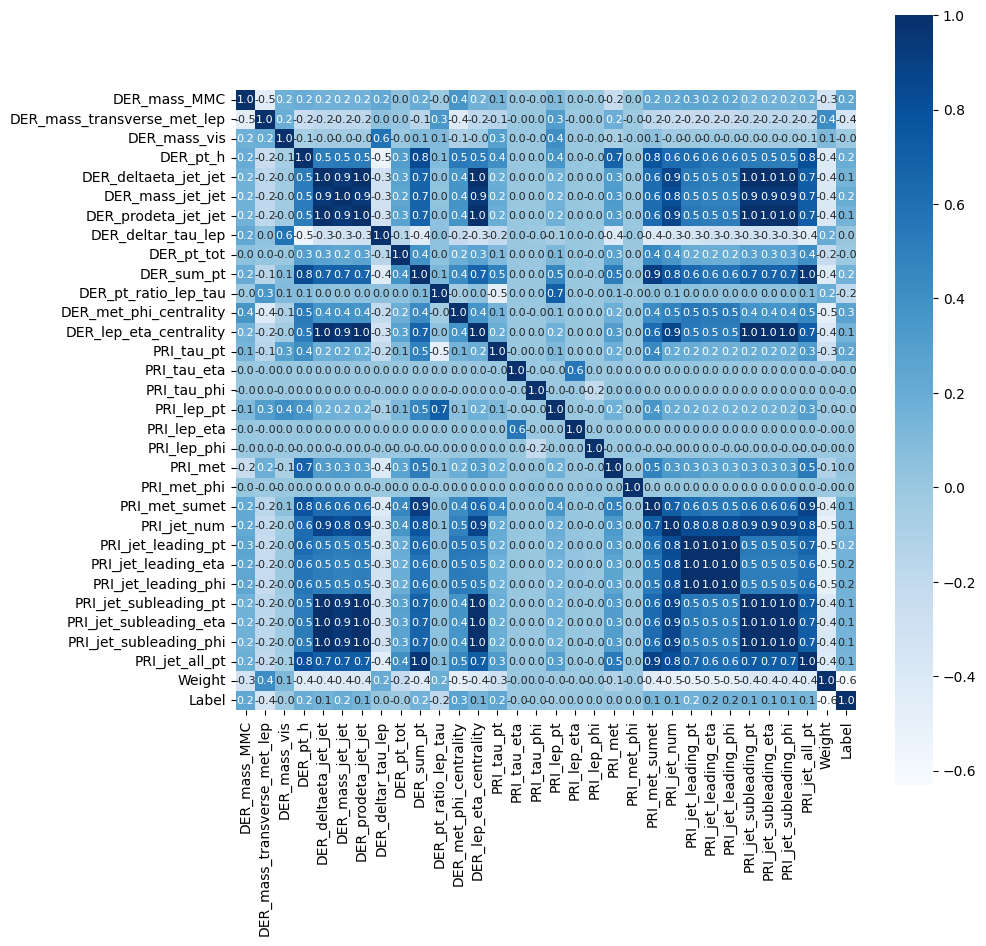

In [ ]:
cor = df.corr()
plt.figure (figsize=(10,10))
sns.heatmap (cor, cbar = True, square = True, fmt = ".1f", annot = True, annot_kws= {'size': 8}, cmap = "Blues" )

**Looking For Correlation Of Independant Features With The Target Variable**

In [ ]:
dep_var = ['Label']
print(cor[dep_var])

                                Label
DER_mass_MMC                 0.239149
DER_mass_transverse_met_lep -0.351428
DER_mass_vis                -0.014055
DER_pt_h                     0.192526
DER_deltaeta_jet_jet         0.141646
DER_mass_jet_jet             0.191766
DER_prodeta_jet_jet          0.140554
DER_deltar_tau_lep           0.012245
DER_pt_tot                  -0.015287
DER_sum_pt                   0.153236
DER_pt_ratio_lep_tau        -0.195398
DER_met_phi_centrality       0.271752
DER_lep_eta_centrality       0.141346
PRI_tau_pt                   0.235238
PRI_tau_eta                 -0.000943
PRI_tau_phi                 -0.004403
PRI_lep_pt                  -0.031948
PRI_lep_eta                  0.001516
PRI_lep_phi                  0.004125
PRI_met                      0.022466
PRI_met_phi                  0.007475
PRI_met_sumet                0.135520
PRI_jet_num                  0.133549
PRI_jet_leading_pt           0.157604
PRI_jet_leading_eta          0.150469
PRI_jet_lead

**Findings: The columns DER_mass_transverse_met_lep, DER_mass_vis, DER_pt_tot, DER_pt_ratio_lep_tau, PRI_tau_eta, PRI_tau_phi, PRI_lep_pt & Weight have a negative correlation with the target variable**

**Plotting Density Plots**

array([<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
       <Axes: ylabel='Density'>, <Axes: ylabel='Density'>], dtype=object)

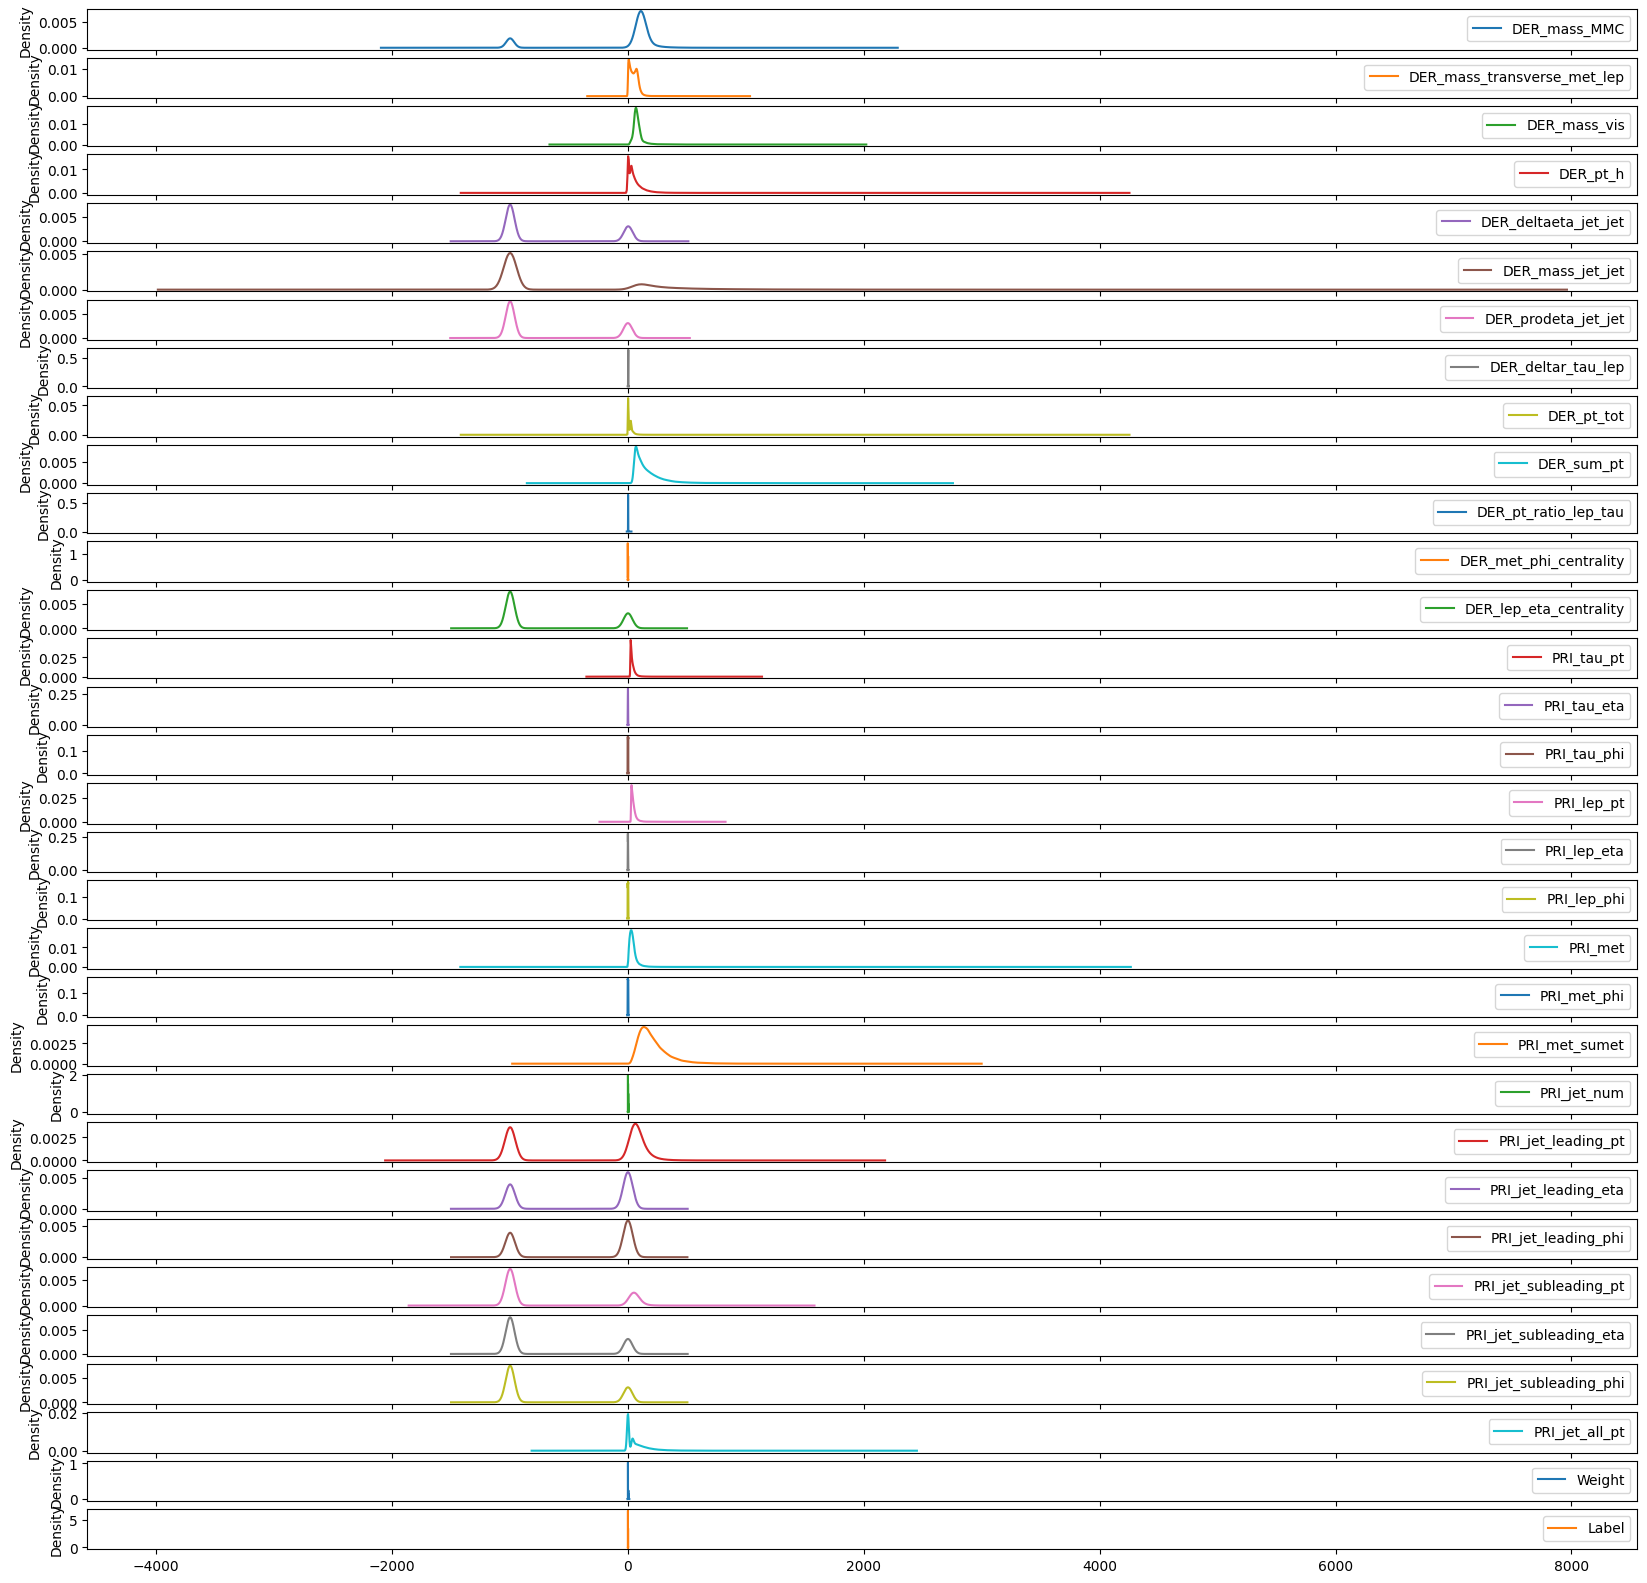

In [ ]:
df.plot (kind = 'density', subplots = True, sharex = True, figsize = (20,20))

**Plotting Box Plots**

DER_mass_MMC                      Axes(0.125,0.11;0.020288x0.77)
DER_mass_transverse_met_lep    Axes(0.149346,0.11;0.020288x0.77)
DER_mass_vis                   Axes(0.173691,0.11;0.020288x0.77)
DER_pt_h                       Axes(0.198037,0.11;0.020288x0.77)
DER_deltaeta_jet_jet           Axes(0.222382,0.11;0.020288x0.77)
DER_mass_jet_jet               Axes(0.246728,0.11;0.020288x0.77)
DER_prodeta_jet_jet            Axes(0.271073,0.11;0.020288x0.77)
DER_deltar_tau_lep             Axes(0.295419,0.11;0.020288x0.77)
DER_pt_tot                     Axes(0.319764,0.11;0.020288x0.77)
DER_sum_pt                      Axes(0.34411,0.11;0.020288x0.77)
DER_pt_ratio_lep_tau           Axes(0.368455,0.11;0.020288x0.77)
DER_met_phi_centrality         Axes(0.392801,0.11;0.020288x0.77)
DER_lep_eta_centrality         Axes(0.417147,0.11;0.020288x0.77)
PRI_tau_pt                     Axes(0.441492,0.11;0.020288x0.77)
PRI_tau_eta                    Axes(0.465838,0.11;0.020288x0.77)
PRI_tau_phi              

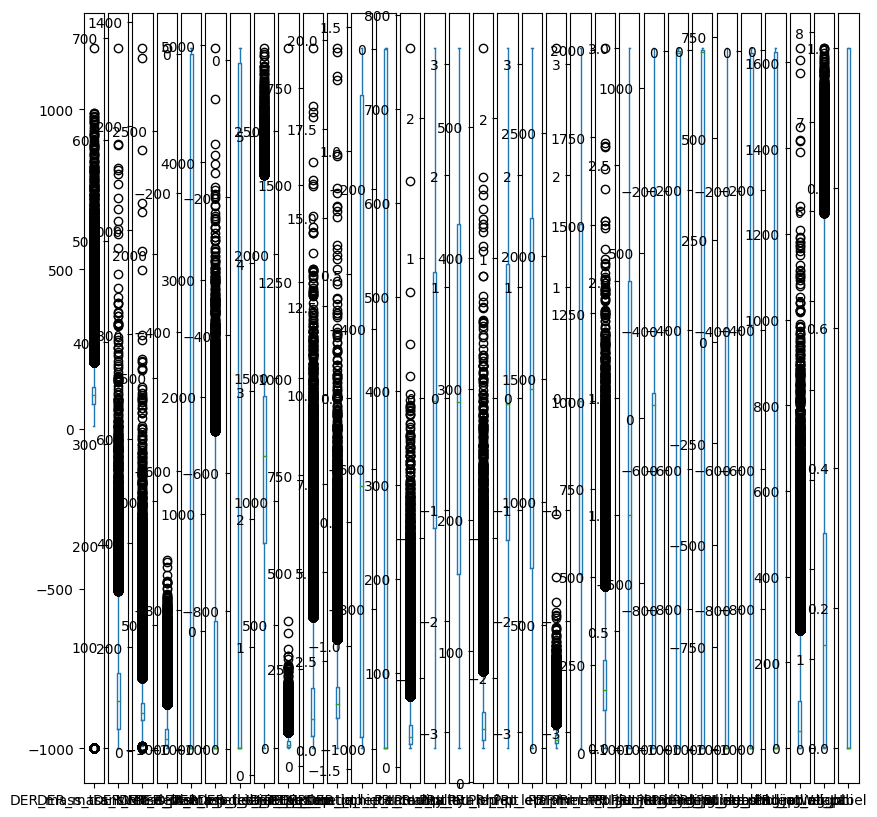

In [ ]:
df.plot (kind = 'box', subplots = True, sharex = False, sharey = False, figsize = (10,10))

**Plotting Scatter Matrix**

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)

array([[<Axes: xlabel='DER_mass_MMC', ylabel='DER_mass_MMC'>,
        <Axes: xlabel='DER_mass_transverse_met_lep', ylabel='DER_mass_MMC'>,
        <Axes: xlabel='DER_mass_vis', ylabel='DER_mass_MMC'>, ...,
        <Axes: xlabel='PRI_jet_all_pt', ylabel='DER_mass_MMC'>,
        <Axes: xlabel='Weight', ylabel='DER_mass_MMC'>,
        <Axes: xlabel='Label', ylabel='DER_mass_MMC'>],
       [<Axes: xlabel='DER_mass_MMC', ylabel='DER_mass_transverse_met_lep'>,
        <Axes: xlabel='DER_mass_transverse_met_lep', ylabel='DER_mass_transverse_met_lep'>,
        <Axes: xlabel='DER_mass_vis', ylabel='DER_mass_transverse_met_lep'>,
        ...,
        <Axes: xlabel='PRI_jet_all_pt', ylabel='DER_mass_transverse_met_lep'>,
        <Axes: xlabel='Weight', ylabel='DER_mass_transverse_met_lep'>,
        <Axes: xlabel='Label', ylabel='DER_mass_transverse_met_lep'>],
       [<Axes: xlabel='DER_mass_MMC', ylabel='DER_mass_vis'>,
        <Axes: xlabel='DER_mass_transverse_met_lep', ylabel='DER_mass_vis'>,

Error in callback <function _draw_all_if_interactive at 0x7f8e9935a0e0> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f8e99359360> (for post_execute):


KeyboardInterrupt: ignored

**Separating The Dedendant And Independant Variables**

In [ ]:
x = df.drop ('Label', axis =1)
y = df['Label']

**Making Train And Test Sets**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.2, stratify =y, random_state =11, shuffle = True)

In [ ]:
print (x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(200000, 31) (200000,) (50000, 31) (50000,)


**Applying Standard Scaler On The Features For Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train_ss = ss.fit_transform(x_train)
x_test_ss = ss.transform(x_test)

**Model Training And Predictions**

In [ ]:
lr = LogisticRegression()
lr.fit (x_train_ss , y_train)
y_pred_train = lr.predict (x_train_ss)
y_pred_test  = lr.predict (x_test_ss)

**Results:**

In [ ]:
training_data_accuracy = accuracy_score(y_pred_train, y_train)
print ("Accuracy On Training Data:", training_data_accuracy*100)

test_data_accuracy = accuracy_score(y_pred_test, y_test)
print ("Accuracy On Test Data:", test_data_accuracy*100)

Accuracy On Training Data: 99.516
Accuracy On Test Data: 99.528


In [ ]:
print ("Correct predictions on training data:", sum (y_train == y_pred_train))
print ("Correct predictions on test data:", sum (y_test == y_pred_test))

print ("Incorrect predictions on training data:", sum (y_train != y_pred_train))
print ("Incorrect predictions on test data:", sum (y_test != y_pred_test))

print ("F1 Score on training data:", f1_score(y_train, y_pred_train))
print ("F1 Score on test data:", f1_score(y_test, y_pred_test))

print('Precision on training data: %.3f' % precision_score(y_train, y_pred_train))
print('Precision on test data: %.3f' % precision_score(y_test, y_pred_test))

print('Recall on training data: %.3f' % recall_score(y_train, y_pred_train))
print('Recall on test data: %.3f' % recall_score(y_test, y_pred_test))

FPR, TPR, threshold = roc_curve(y_train, y_pred_train)
print('roc_auc_score on training data: ', roc_auc_score(y_train, y_pred_train))

FPR, TPR, threshold = roc_curve(y_test, y_pred_test)
print('roc_auc_score on test data: ', roc_auc_score(y_test, y_pred_test))

Correct predictions on training data: 199032
Correct predictions on test data: 49764
Incorrect predictions on training data: 968
Incorrect predictions on test data: 236
F1 Score on training data: 0.9929851005855412
F1 Score on test data: 0.9931578337005683
Precision on training data: 0.986
Precision on test data: 0.987
Recall on training data: 1.000
Recall on test data: 1.000
roc_auc_score on training data:  0.9962416072973238
roc_auc_score on test data:  0.9963399196218945


In [ ]:
print ("Confusion Matrix of training data:\n", confusion_matrix(y_train , y_pred_train))

Confusion Matrix of training data:
 [[130520    946]
 [    22  68512]]


**Plotting The Confusion Matrix On Training Data**

<Axes: >

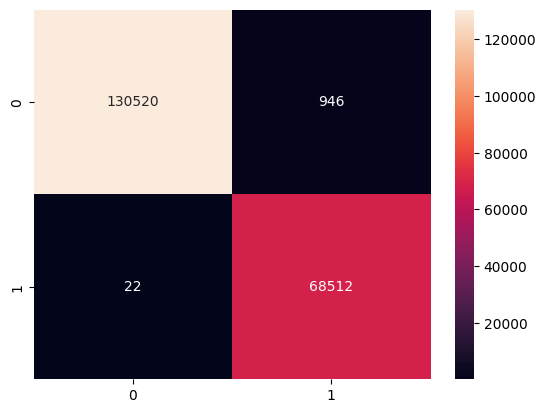

In [ ]:
sns.heatmap (confusion_matrix(y_train , y_pred_train), annot = True, fmt ='d')

In [ ]:
print ("Confusion Matrix of test data:\n", confusion_matrix(y_test , y_pred_test))

Confusion Matrix of test data:
 [[32636   231]
 [    5 17128]]


**Plotting The Confusion Matrix On Test Data**

<Axes: >

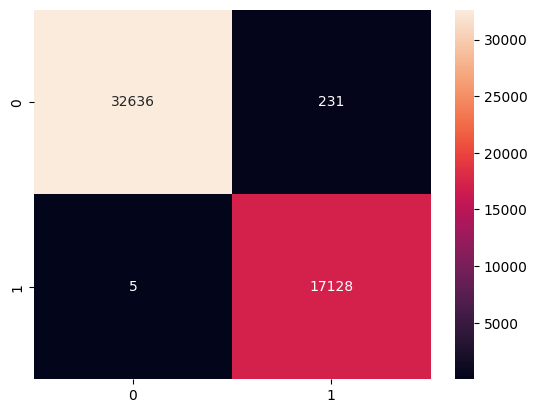

In [ ]:
sns.heatmap (confusion_matrix(y_test , y_pred_test), annot = True, fmt ='d')

In [ ]:
print ("Classification Report Of Training Data:\n", classification_report (y_train, y_pred_train, digits = 4))

Classification Report Of Training Data:
               precision    recall  f1-score   support

           0     0.9998    0.9928    0.9963    131466
           1     0.9864    0.9997    0.9930     68534

    accuracy                         0.9952    200000
   macro avg     0.9931    0.9962    0.9946    200000
weighted avg     0.9952    0.9952    0.9952    200000



In [ ]:
print ("Classification Report Of Test Data:\n", classification_report (y_test, y_pred_test, digits = 4))

Classification Report Of Test Data:
               precision    recall  f1-score   support

           0     0.9998    0.9930    0.9964     32867
           1     0.9867    0.9997    0.9932     17133

    accuracy                         0.9953     50000
   macro avg     0.9933    0.9963    0.9948     50000
weighted avg     0.9953    0.9953    0.9953     50000



**Making Predictions**

In [ ]:
input_data = (144.649,	24.473,	87.548,	34.198,	-999.0,	-999.0,	-999.0,	3.08,	34.198,
              97.171, 0.396,	1.414,	-999.0,	69.629,	-2.36,	0.728,	27.542,	-2.354,
              -2.475,	39.653, 3.05,	181.239,	0,	-999.0,	-999.0,	-999.0,	-999.0,	-999.0,
              -999.0,	0.0,	0.018636)

input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = ss.transform(input_data_reshaped)

prediction = lr.predict(std_data)

if (prediction[0] == 0):
  print('This is a background event')
else:
  print('This is a Higgs Boson signal')

This is a Higgs Boson signal
